# Multimodal Data

## Load Text & Image data

In [67]:
movie_path = './data/ml-1m/movies_augmented.csv'
rating_path = './data/ml-1m/ratings_filtered.csv'
rec_rating_path = './data/ml-1m/recmov_ratings.csv'
prox_rating_path = './data/ml-1m/proxmov_ratings.csv'
rec_prox_rating_path = './data/ml-1m/recmov_proxmov_ratings.csv'
users_path = './data/ml-1m/user_rec_movies.csv'

In [68]:
movies = pd.read_csv(movie_path)
movies['Prox_Genres'] = movies['Prox_Genres'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').replace(' ', '')).replace('\'', '')
movies['Prox_Movies'] = movies['Prox_Movies'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '')).replace('\'', '')
movies['text'] = movies['Title'] + ' ' + movies['Summary'] + ' ' + movies['PosterDescription'] + movies['Prox_Genres']
movies['text_movies'] = movies['Title'] + ' ' + movies['Summary'] + ' ' + movies['PosterDescription'] + movies['Prox_Genres'] + movies['Prox_Movies']

movies.head(3)

,MovieID,Title,Genres,PosterName,Overview,PosterPath,PosterDownloaded,Prox_Genres,Prox_Movies,PosterDescription,Summary,text,text_movies
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']",Toy_Story_1995.jpg,"Led by Woody, Andy's toys live happily in his ...",/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,True,"'Drama','Fantasy','Thriller'","'In Crowd, The (2000)', 'Rules of Engagement (...","The poster is vibrant and colorful, dominated...",The movie follows Woody and Buzz Lightyear as ...,Toy Story (1995) The movie follows Woody and B...,Toy Story (1995) The movie follows Woody and B...
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']",Jumanji_1995.jpg,When siblings Judy and Peter discover an encha...,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,True,"'Thriller','Action','Comedy'","'Taxi Driver (1976)', 'Cruising (1980)', 'Boys...",The poster features a vibrant and colorful de...,"In this adventure-fantasy film, siblings Judy ...","Jumanji (1995) In this adventure-fantasy film,...","Jumanji (1995) In this adventure-fantasy film,..."
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']",Grumpier_Old_Men_1995.jpg,A family wedding reignites the ancient feud be...,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,True,"'Action','Mystery','Thriller'","'Hard Eight (1996)', 'F/X 2 (1992)', 'Rawhead ...",The poster features a group of people posing ...,A family wedding sparks an old feud between fr...,Grumpier Old Men (1995) A family wedding spark...,Grumpier Old Men (1995) A family wedding spark...


In [70]:
users = pd.read_csv(users_path)
users['Rec_Genres'] = users['Rec_Genres'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '').replace(' ', '')).replace('\'', '')
users['Rec_Movies'] = users['Rec_Movies'].apply(lambda x: x.replace('[', '').replace(']', '').replace('"', '')).replace('\'', '')
users['text'] = users['Persona'] + ' ' + users['Rec_Genres'] + ' ' + users['Rec_Movies']
users.head(3)

,UserID,Gender,Age,Occupation,Zip-code,genre_ratings,top_genres,Movies,Persona,Rec_Genres,Rec_Movies,Rec_Movies_Genres,Rec_MovieID,text
0,1,F,Under 18,K-12 student,48067,"[('War', 5.0), ('Drama', 4.4), ('Musical', 4.3...","['War', 'Drama', 'Sci-Fi']","[""One Flew Over the Cuckoo's Nest (1975)"", 'Ja...",This young female student spends most of her f...,"'Fantasy','Film-Noir','Horror','IMAX','Mystery'","'Before and After (1996)', 'Chungking Express ...","[['Drama', 'Mystery'], ['Drama', 'Mystery', 'R...","[113, 123, 160, 164, 731, 257, 800, 26, 695, 3...",This young female student spends most of her f...
1,2,M,56+,self-employed,70072,"[('Western', 4.3), ('Film-Noir', 4.0), ('Drama...","['Western', 'Film-Noir', 'Drama']","[""One Flew Over the Cuckoo's Nest (1975)"", 'Aw...",He is a self-employed individual who values in...,"'Animation','Documentary','Fantasy','IMAX','Mu...","'American Pop (1981)', 'Anchors Aweigh (1945)'...","[['Animation', 'Musical'], ['Comedy', 'Musical...","[3725, 3599, 346, 935, 1031, 3383, 3600, 1772,...",He is a self-employed individual who values in...
2,3,M,25-34,scientist,55117,"[('Western', 4.7), ('Fantasy', 4.5), ('Action'...","['Western', 'Fantasy', 'Adventure']","[""Bug's Life, A (1998)"", ""Bug's Life, A (1998)...",He is a detail-oriented scientist who values a...,"'Film-Noir','IMAX','Crime','Documentary','Musi...","'Aladdin (1992)', 'Backbeat (1993)', 'Boys of ...","[['Animation', 'Childrens', 'Comedy', 'Musical...","[588, 346, 121, 242, 364, 73, 107, 126, 551, 4...",He is a detail-oriented scientist who values a...


## Load embeddings (if done)

In [890]:
# If the embeddings have been generated and saved already
# Load Item Embeddings
with open('./data/llama3/item_text_image_embeddings.json', 'r') as json_file:
    data = json.load(json_file)

item_embeddings = {}
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    item_embeddings[outer_key] = {}
    for inner_key, value in inner_dict.items():
        item_embeddings[outer_key][inner_key] = torch.tensor(value)    


In [891]:
# Load User Embeddings
with open('./data/llama3/user_text_image_embeddings.json', 'r') as json_file:
    data = json.load(json_file)

user_embeddings = {}
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    user_embeddings[outer_key] = {}
    for inner_key, value in inner_dict.items():
        user_embeddings[outer_key][inner_key] = torch.tensor(value)  

In [10]:
# If the embeddings have been generated and saved already
# Load User_Item Embeddings
with open('./data/ml-1m/embeddings/diverse_user_item_text_embeddings_no_movies.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings = {}
item_embeddings = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6040:
        user_embeddings[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings[outer_key][inner_key] = torch.tensor(value)

In [11]:
# If the embeddings have been generated and saved already
# Load User_Item Embeddings
with open('./data/ml-1m/embeddings/diverse_user_item_text_embeddings.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings2 = {}
item_embeddings2 = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6040:
        user_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings2[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings2[outer_key][inner_key] = torch.tensor(value)

In [12]:
# Separate text and image embeddings
user_item_embeddings = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings.items():
    user_item_embeddings[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings.items():
    user_item_embeddings[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings = {k: v['text_embedding'] for k, v in user_item_embeddings .items()}

text_embeddings = torch.stack(list(text_embeddings.values()))


In [13]:
# Separate text and image embeddings
user_item_embeddings2 = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings2.items():
    user_item_embeddings2[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings2.items():
    user_item_embeddings2[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings2 = {k: v['text_embedding'] for k, v in user_item_embeddings2.items()}

text_embeddings2 = torch.stack(list(text_embeddings2.values()))


## Generate embeddings

### Text Embeddings

In [ ]:
#Pre-req for text embeddings
!pip install ollama
!ollama pull llama3
!pip install llama-index==0.10.32
!pip install langchain
!pip install langchain_community


In [58]:
from langchain_community.embeddings import OllamaEmbeddings

ollama_emb = OllamaEmbeddings(
    model="llama3.1",
)

In [35]:
from transformers import RobertaModel, RobertaTokenizer

# Load the tokenizer and model
text_model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(text_model_name)
text_model = RobertaModel.from_pretrained(text_model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [61]:
import torch
import torch.nn.functional as F

def mean_pooling(model_output, attention_mask):
    """
    Applies mean pooling to the model output, taking the attention mask into account to exclude padding tokens.
    """
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, dim=1)
    sum_mask = torch.clamp(input_mask_expanded.sum(dim=1), min=1e-9)
    return sum_embeddings / sum_mask
           
def generate_text_embedding(text):
 
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Get the output from the model
    try:
        with torch.no_grad():
            output = text_model(**encoded_input)
    except TypeError as e:
        print(f"TypeError: {str(e)}")

    # Extract embeddings
    text_emb = mean_pooling(output, encoded_input['attention_mask']).squeeze(0)
    
    # L2 normalization
    text_emb = F.normalize(text_emb, p=2, dim=0)

    return text_emb 

In [37]:
test_tensor = generate_text_embedding("text")
test_tensor.shape

torch.Size([768])

In [605]:
# Placeholder functions for generating embeddings
def generate_text_embedding(text):
    text_emb = torch.tensor(ollama_emb.embed_query(text))
    return text_emb 

### Image embeddings

In [ ]:
#Pre-req for image embeddings
!pip install torchvision
from torchvision import models

In [188]:
import torch
import random
import torchvision.transforms as transforms
from PIL import Image

def generate_image_embedding(image_path):
    model = models.resnet50(pretrained=True)
    # Remove the final fully connected layer to use the model as a feature extractor
    model = torch.nn.Sequential(*(list(model.children())[:-1]))

    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    try:
        image = Image.open(image_path).convert("RGB")
        image = preprocess(image)
    except:
        # Return a random tensor if image.open fails
        image = torch.randn(3, 224, 224)

    image = image.unsqueeze(0)

    with torch.no_grad():
        embedding = model(image)

    img_emb = torch.flatten(embedding, 1)

    return img_emb

### Mapping

In [38]:
movies.at[1,'text']

'Jumanji (1995) In this adventure-fantasy film, siblings Judy and Peter discover a magical board game that unleashes chaos in their living room. As they navigate through the game with an adult trapped inside, they must escape from ferocious creatures like giant rhinoceroses and evil monkeys.  The poster features a vibrant and colorful design with a humorous and cartoonish style. It depicts a group of characters from the animated series "The Jungle Book," including Mowgli, Kaa, Baloo, and others, set against a backdrop filled with jungle-related elements such as foliage and wildlife. The overall theme of the poster suggests an adventure or comedy film, likely appealing to families and fans of the original story.  Action, Comedy, Drama, Thriller, Horror'

In [48]:
len(users)

6040

In [51]:
movie_info = dict()
for i, (old_key, old_value) in enumerate(movie_mapping.items()):
    if i < 3417:
        movie_info[old_key] = {
            'text': movies.at[i,'text'],
            'text_movies': movies.at[i,'text_movies']
        }       


In [52]:
user_info = dict()
for i, (old_key, old_value) in enumerate(user_mapping.items()):
    if i <= 6040:
        user_info[old_key] = {
            'text': users.at[i,'text'],
            'text_movies': users.at[i,'text_movies']
        }

In [53]:
user_mapping.items()

dict_items([(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18), (20, 19), (21, 20), (22, 21), (23, 22), (24, 23), (25, 24), (26, 25), (27, 26), (28, 27), (29, 28), (30, 29), (31, 30), (32, 31), (33, 32), (34, 33), (35, 34), (36, 35), (37, 36), (38, 37), (39, 38), (40, 39), (41, 40), (42, 41), (43, 42), (44, 43), (45, 44), (46, 45), (47, 46), (48, 47), (49, 48), (50, 49), (51, 50), (52, 51), (53, 52), (54, 53), (55, 54), (56, 55), (57, 56), (58, 57), (59, 58), (60, 59), (61, 60), (62, 61), (63, 62), (64, 63), (65, 64), (66, 65), (67, 66), (68, 67), (69, 68), (70, 69), (71, 70), (72, 71), (73, 72), (74, 73), (75, 74), (76, 75), (77, 76), (78, 77), (79, 78), (80, 79), (81, 80), (82, 81), (83, 82), (84, 83), (85, 84), (86, 85), (87, 86), (88, 87), (89, 88), (90, 89), (91, 90), (92, 91), (93, 92), (94, 93), (95, 94), (96, 95), (97, 96), (98, 97), (99, 98), (100, 99), (101, 

In [56]:
# Combine the user and item mapping dictionaries

combined_info = {}
# Increment keys in dict2 by the maximum key in dict1
increment = max(user_info.keys(), default=0)
adjusted_movie_info = {key + increment: value for key, value in movie_info.items()}

# Combine the dictionaries
combined_info = {**user_info, **adjusted_movie_info}
combined_info

{1: {'text': 'A young, passionate storyteller, this individual finds joy in exploring complex narratives through the lens of thought-provoking films that blur the lines between reality and fantasy. With a flair for creativity and a deep appreciation for character-driven tales, they often draw inspiration from both historical and imaginative worlds, making connections that enrich their own understanding of life and society. Documentary, Horror, Mystery, Film-Noir, Western',
  'text_movies': 'A young, passionate storyteller, this individual finds joy in exploring complex narratives through the lens of thought-provoking films that blur the lines between reality and fantasy. With a flair for creativity and a deep appreciation for character-driven tales, they often draw inspiration from both historical and imaginative worlds, making connections that enrich their own understanding of life and society. Documentary, Horror, Mystery, Film-Noir, Western Once Upon a Time in the West (1969), Falle

In [68]:
generate_text_embedding(combined_info[2661]['text']).shape

torch.Size([768])

In [281]:
combined_info[5475]

{'text': "He is a driven and curious individual who balances academic pursuits with an active interest in exploring different perspectives on social issues through documentaries. As a fantasy and mystery enthusiast, he often uses film as an escape from the demands of student life, drawn to stories that challenge his perceptions and ignite his imagination. 'IMAX','Film-Noir' 'Across the Sea of Time (1995)', 'American President, The (1995)', 'Big Green, The (1995)', 'Brother Minister: The Assassination of Malcolm X (1994)', 'Chinatown (1974)', 'City Hall (1996)', 'Costa Brava (1946)', 'Crossfire (1947)', 'Dead Man Walking (1995)', Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996), 'East of Eden (1955)', 'Father of the Bride Part II (1995)', 'Girl 6 (1996)', 'Guardian Angel (1994)', 'Home for the Holidays (1995)', 'Lawnmower Man 2: Beyond Cyberspace (1996)', 'Little Buddha (1993)', 'Man of the Year (1995)', 'Money Train (1995)', 'Murder, My Sweet (1944)', 'Ot

In [132]:
combined_info[5475]['text'] = "He is a driven and curious individual who balances academic pursuits with an active interest in exploring different perspectives on social issues through documentaries. As a fantasy and mystery enthusiast, he often uses film as an escape from the demands of student life, drawn to stories that challenge his perceptions and ignite his imagination. ['IMAX', 'Film-Noir'] 'Devil in a Blue Dress','Suture''Blade Runner','Mulholland Falls''Force of Evil''The Maltese Falcon''Sunset Blvd. (a.k.a. Sunset Boulevard)' 'Shadow of a Doubt''Frogs for Snakes','The Killing', 'Killer's Kiss', 'Gilda','Who Framed Roger Rabbit?', 'The Hitch-Hiker'"
 

In [184]:
combined_info[6041]

{'text': 'Toy Story (1995) The movie follows Woody and Buzz Lightyear as they navigate a rivalry that turns into an unlikely friendship after being separated from their owner Andy. This heartwarming animated comedy showcases the evolution of their relationship through various adventures.  The poster is vibrant and colorful, dominated by the bright blue background. It features stylized characters from the Toy Story franchise, which are designed with a cartoonish aesthetic and bold outlines. The main visual elements include Buzz Lightyear floating in the foreground and various Pixar characters scattered around him, suggesting an adventurous theme common to this animated film series.\n\nThe overall style is playful and child-friendly, typical of animation. The mood suggested by the poster is fun, engaging, and full of action, reflecting the excitement and adventure often associated with these beloved animated films.  Adventure ,  Fantasy ,  Action '}

In [ ]:
from collections import defaultdict
user_item_embeddings = defaultdict(dict)

for row_id, data in combined_info.items():
    if row_id >= len(user_item_embeddings):
        if len(data['text']) > 1860:
            temp = data['text'][:1860]
            text_embedding = generate_text_embedding(temp)
        else: text_embedding = generate_text_embedding(data['text'])
       
        
        user_item_embeddings[row_id]['text_embedding'] = torch.tensor(text_embedding)
        

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_3652/2442128509.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  user_item_embeddings[row_id]['text_embedding'] = torch.tensor(text_embedding)


In [70]:
from tqdm import tqdm
import concurrent.futures
from collections import defaultdict
user_item_embeddings = defaultdict(dict)

# Define a function to generate text embeddings
def generate_text_embedding_batch(row):
    try:
        if len(row['text']) > 1860:
            temp = row['text'][:1860]
            embedding = generate_text_embedding(temp)
        else:
            embedding = generate_text_embedding(row['text'])
        return embedding
    except Exception as e:
        pass
        #print(f"An error occurred: {e}")
    return None

# Create a ThreadPoolExecutor with the desired number of workers
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the tasks to the executor
    futures = [executor.submit(generate_text_embedding_batch, row) for _, row in combined_info.items()]
    
    # Create a progress bar
    progress_bar = tqdm(total=len(futures))
    
    # Retrieve the results as they become available
    for future in concurrent.futures.as_completed(futures):
        # Get the result of the task
        result = future.result()
        
        # Update the corresponding row in the users DataFrame
        index = futures.index(future)
        if result is not None:
            user_item_embeddings[index]['text_embedding'] = result
        
        # Update the progress bar
        progress_bar.update(1)
    
    # Close the progress bar
    progress_bar.close()

OMP: Warning #191: Forking a process while a parallel region is active is potentially unsafe.
100%|██████████| 9457/9457 [52:53<00:00,  2.98it/s]  


In [72]:
from tqdm import tqdm
import concurrent.futures
from collections import defaultdict
user_item_embeddings2 = defaultdict(dict)

# Define a function to generate text embeddings
def generate_text_embedding_batch(row):
    try:
        if len(row['text']) > 1860:
            temp = row['text'][:1860]
            embedding = generate_text_embedding(temp)
        else:
            embedding = generate_text_embedding(row['text_movies'])
        return embedding
    except Exception as e:
        pass
        #print(f"An error occurred: {e}")
    return None

# Create a ThreadPoolExecutor with the desired number of workers
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit the tasks to the executor
    futures = [executor.submit(generate_text_embedding_batch, row) for _, row in combined_info.items()]
    
    # Create a progress bar
    progress_bar = tqdm(total=len(futures))
    
    # Retrieve the results as they become available
    for future in concurrent.futures.as_completed(futures):
        # Get the result of the task
        result = future.result()
        
        # Update the corresponding row in the users DataFrame
        index = futures.index(future)
        if result is not None:
            user_item_embeddings2[index]['text_embedding'] = result
        
        # Update the progress bar
        progress_bar.update(1)
    
    # Close the progress bar
    progress_bar.close()

100%|██████████| 9457/9457 [1:01:38<00:00,  2.56it/s]


In [ ]:
from collections import defaultdict
user_item_embeddings = defaultdict(dict)

# Step 2: Generate and track embeddings
for row_id, data in combined_info.items():
    if len(data['text']) > 1860:
            temp = data['text'][:1860]
            text_embedding = generate_text_embedding(temp)
    else: 
        text_embedding = generate_text_embedding(data['text'])
    
       
    user_item_embeddings[row_id]['text_embedding'] = torch.tensor(text_embedding)


In [ ]:
# Step 2: Generate and track embeddings
for row_id, data in combined_info.items():
    text_embedding = generate_text_embedding(data['text'])
    #image_embedding = generate_image_embedding(data['img_path'])
       
    user_item_embeddings[row_id]['text_embedding'] = torch.tensor(text_embedding)

In [260]:
 user_item_embeddings[1]['text_embedding'].shape[0]

4096

In [73]:
# Download embeddings
def convert_keys_to_strings(d):
    converted = {}
    for key, value in d.items():
        new_key = str(key)  # Convert the key to a string
        if isinstance(value, torch.Tensor):
            converted[new_key] = value.tolist()  # Convert tensor to list
        elif isinstance(value, dict):
            converted[new_key] = convert_keys_to_strings(value)  # Recursively convert nested dicts and their keys
        else:
            converted[new_key] = value  # Keep other types as they are
    return converted

# Convert the mixed dictionary and its keys
user_item_embeddings_list2 = convert_keys_to_strings(user_item_embeddings2)

# Write the converted dictionary to a JSON file
with open('./data/ml-1m/diverse_user_item_text_embeddings.json', 'w') as json_file:
    json.dump(user_item_embeddings_list2, json_file)

In [672]:
# Separate text and image embeddings for Roberta

text_embeddings_dict = {k: v['text_embedding'] for k, v in user_item_embeddings.items() if 'text_embedding' in v}
#image_embeddings_dict = {k: v['image_embedding'] for k, v in user_item_embeddings.items() if 'image_embedding' in v}

# Ensure all tensors are dense before stacking
def convert_to_dense(tensor):
    if tensor.is_sparse:
        return tensor.to_dense()
    return tensor

# Convert and stack text embeddings
text_embeddings = torch.stack([convert_to_dense(v) for v in text_embeddings_dict.values()])

# Convert and stack image embeddings (if needed)
#image_embeddings = torch.stack([convert_to_dense(v) for v in image_embeddings_dict.values()])
#image_embeddings = image_embeddings.squeeze(1)

In [ ]:
# Separate text and image embeddings for Llama3
     
# Making 1 dict for the text embeddings
user_item_embeddings_list = {k: v['text_embedding'] for k, v in user_item_embeddings.items() if 'text_embedding' in v}
text_embeddings = torch.stack(list(text_embeddings.values()))

# Making 1 dict for the image embeddings
user_item_embeddings_list = {k: v['image_embedding'] for k, v in user_item_embeddings.items() if 'image_embedding' in v}
image_embeddings = torch.stack(list(image_embeddings.values()))
image_embeddings = image_embeddings.squeeze(1)

## Visualize Embeddings

# Data & Metrics

In [1]:
# import required modules
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import torch
from torch import nn, optim, Tensor

from torch_sparse import SparseTensor, matmul

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/zacpangan/opt/anaconda3/envs/lightgcn/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [71]:
# BASE RATINGS DATASET
# load user and movie nodes
def load_node_csv(path, index_col):
    """Loads csv containing node information

    Args:
        path (str): path to csv file
        index_col (str): column name of index column

    Returns:
        dict: mapping of csv row to node id
    """
    df = pd.read_csv(path, index_col=index_col)
    mapping = {index: i for i, index in enumerate(df.index.unique())}
    return mapping


user_mapping = load_node_csv(rating_path, index_col='UserID')
movie_mapping = load_node_csv(movie_path, index_col='MovieID')

In [72]:
# Load Genres
movie_genres = movies['Genres'].apply(lambda x: ast.literal_eval(x))
item_genres = {key: ','.join(movie_genres[val]).split(',') for key, val in movie_mapping.items() if val in movie_genres.index}
item_genres

{1: ['Animation', "Children's", 'Comedy'],
 2: ['Adventure', "Children's", 'Fantasy'],
 3: ['Comedy', 'Romance'],
 4: ['Comedy', 'Drama'],
 5: ['Comedy'],
 6: ['Action', 'Crime', 'Thriller'],
 7: ['Comedy', 'Romance'],
 8: ['Adventure', "Children's"],
 9: ['Action'],
 10: ['Action', 'Adventure', 'Thriller'],
 11: ['Comedy', 'Drama', 'Romance'],
 12: ['Comedy', 'Horror'],
 13: ['Animation', "Children's"],
 14: ['Drama'],
 15: ['Action', 'Adventure', 'Romance'],
 16: ['Drama', 'Thriller'],
 17: ['Drama', 'Romance'],
 18: ['Thriller'],
 19: ['Comedy'],
 20: ['Action'],
 21: ['Action', 'Comedy', 'Drama'],
 22: ['Crime', 'Drama', 'Thriller'],
 23: ['Thriller'],
 24: ['Drama', 'Sci-Fi'],
 25: ['Drama', 'Romance'],
 26: ['Drama'],
 27: ['Drama'],
 28: ['Romance'],
 29: ['Adventure', 'Sci-Fi'],
 31: ['Drama'],
 32: ['Drama', 'Sci-Fi'],
 33: ['Adventure', 'Romance'],
 34: ["Children's", 'Comedy', 'Drama'],
 35: ['Drama', 'Romance'],
 36: ['Drama'],
 37: ['Documentary'],
 38: ['Comedy'],
 39: ['

In [73]:
unique_genres = sorted(set(g for genres in item_genres.values() for g in genres))
genre_to_idx = {genre: i for i, genre in enumerate(unique_genres)}
num_items = max(item_genres.keys()) + 1
num_genres = len(unique_genres)
unique_genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [287]:
genre_matrix = torch.zeros((num_items, num_genres))
for item_id, genres in item_genres.items():
    for genre in genres:
        if genre in genre_to_idx:
            genre_matrix[item_id, genre_to_idx[genre]] = 1.0


In [18]:
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping):
    """Loads csv containing edges between users and items

    Args:
        path (str): path to csv file
        src_index_col (str): column name of users
        src_mapping (dict): mapping between row number and user id
        dst_index_col (str): column name of items
        dst_mapping (dict): mapping between row number and item id

    Returns:
        torch.Tensor: 2 by N matrix containing the node ids of N user-item edges
    """
    df = pd.read_csv(path)

    # Initialize edge_index as an empty list of lists
    edge_index = [[], []]
    found_edges = False  # A flag to track if any edges are added

    # Map the source and destination nodes using list comprehension
    src = [src_mapping.get(index) for index in df[src_index_col]]
    dst = [dst_mapping.get(index) for index in df[dst_index_col]]

    # Loop through src and dst and append valid edges to edge_index
    for i in range(len(src)):
        if src[i] is not None and dst[i] is not None:  # Check if src and dst nodes exist in mappings
            edge_index[0].append(src[i])
            edge_index[1].append(dst[i])
            found_edges = True  # Mark that edges were added

    # Post-loop check to handle case where no edges were found
    if not found_edges:
        print("Warning: No valid edges found, edge_index remains empty.")

    # Convert edge_index to a PyTorch tensor
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    return edge_index


### Base Graph

In [74]:
edge_index0 = load_edge_csv(
    rating_path,
    src_index_col='UserID',
    src_mapping=user_mapping,
    dst_index_col='MovieID',
    dst_mapping=movie_mapping
)

In [75]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index0.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=1)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=1)

train_edge_index0 = edge_index0[:, train_indices]
val_edge_index0 = edge_index0[:, val_indices]
test_edge_index0 = edge_index0[:, test_indices]

In [76]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
train_sparse_edge_index0 = SparseTensor(row=train_edge_index0[0], col=train_edge_index0[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index0 = SparseTensor(row=val_edge_index0[0], col=val_edge_index0[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index0 = SparseTensor(row=test_edge_index0[0], col=test_edge_index0[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

### Rec Movies Graph

In [77]:
edge_index1 = load_edge_csv(
    rec_rating_path,
    src_index_col='UserID',
    src_mapping=user_mapping,
    dst_index_col='MovieID',
    dst_mapping=movie_mapping,
)

combined_edge_index = torch.cat([edge_index0, edge_index1], dim=1)  # (2, N)
edge_index1 = combined_edge_index 

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_13426/4103993342.py:14: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [78]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index1.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=10)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=10)

train_edge_index1 = edge_index1[:, train_indices]
val_edge_index1 = edge_index1[:, val_indices]
test_edge_index1 = edge_index1[:, test_indices]

In [79]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
train_sparse_edge_index1 = SparseTensor(row=train_edge_index1[0], col=train_edge_index1[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index1 = SparseTensor(row=val_edge_index1[0], col=val_edge_index1[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index1 = SparseTensor(row=test_edge_index1[0], col=test_edge_index1[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

### Prox Movies Graph

In [82]:
edge_index2 = load_edge_csv(
    prox_rating_path,
    src_index_col='MovieID',
    src_mapping=movie_mapping,
    dst_index_col='Prox_MovieID',
    dst_mapping=movie_mapping
)

combined_edge_index = torch.cat([edge_index0, edge_index2], dim=1)  # (2, N)
edge_index2 = combined_edge_index 

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_13426/4103993342.py:14: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [83]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index2.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=10)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=10)

train_edge_index2 = edge_index2[:, train_indices]
val_edge_index2 = edge_index2[:, val_indices]
test_edge_index2 = edge_index2[:, test_indices]

In [84]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
train_sparse_edge_index2 = SparseTensor(row=train_edge_index2[0], col=train_edge_index2[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index2 = SparseTensor(row=val_edge_index2[0], col=val_edge_index2[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index2 = SparseTensor(row=test_edge_index2[0], col=test_edge_index2[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

### Rec Movies + Prox Movies Graph

In [85]:
edge_indexa = load_edge_csv(
    rec_rating_path,
    src_index_col='UserID',
    src_mapping=user_mapping,
    dst_index_col='MovieID',
    dst_mapping=movie_mapping,
)

edge_indexb = load_edge_csv(
    prox_rating_path,
    src_index_col='MovieID',
    src_mapping=movie_mapping,
    dst_index_col='Prox_MovieID',
    dst_mapping=movie_mapping
)


combined_edge_index = torch.cat([edge_index0, edge_indexa, edge_indexb], dim=1)  # (2, N)
edge_index3 = combined_edge_index 

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_13426/4103993342.py:14: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_13426/4103993342.py:14: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [31]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index3.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=10)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=10)

train_edge_index3 = edge_index3[:, train_indices]
val_edge_index3 = edge_index3[:, val_indices]
test_edge_index3 = edge_index3[:, test_indices]

In [32]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
train_sparse_edge_index3 = SparseTensor(row=train_edge_index3[0], col=train_edge_index3[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index3 = SparseTensor(row=val_edge_index3[0], col=val_edge_index3[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index3 = SparseTensor(row=test_edge_index3[0], col=test_edge_index3[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

In [86]:
print(edge_index0.shape,
edge_index1.shape,
edge_index2.shape,
edge_index3.shape)

torch.Size([2, 843938]) torch.Size([2, 1825826]) torch.Size([2, 868453]) torch.Size([2, 1850341])


In [33]:
# function which random samples a mini-batch of positive and negative samples
def sample_mini_batch(batch_size, edge_index, num_movies=num_movies):
    """Randomly samples indices of a minibatch given an adjacency matrix

    Args:
        batch_size (int): minibatch size
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        tuple: user indices, positive item indices, negative item indices
    """
    edges = structured_negative_sampling(edge_index, num_movies)
    edges = torch.stack(edges, dim=0)
    indices = random.choices(
        [i for i in range(edges[0].shape[0])], k=batch_size)
    batch = edges[:, indices]
    user_indices, pos_item_indices, neg_item_indices = batch[0], batch[1], batch[2]
    return user_indices, pos_item_indices, neg_item_indices

### Dual Graph Implementation (Div + Accuracy)

In [1005]:
edge_index_acc = load_edge_csv(
    rating_path,
    src_index_col='UserID',
    src_mapping=user_mapping,
    dst_index_col='MovieID',
    dst_mapping=movie_mapping,
    link_index_col='Rating',
    rating_threshold=2,
)

In [1006]:
edge_index = load_edge_csv(
    rec_rating_path,
    src_index_col='UserID',
    src_mapping=user_mapping,
    dst_index_col='MovieID',
    dst_mapping=movie_mapping,
    link_index_col='Rating',
    rating_threshold=2,
)

edge_index2 = load_edge_csv(
    prox_rating_path,
    src_index_col='MovieID',
    src_mapping=movie_mapping,
    dst_index_col='Prox_MovieID',
    dst_mapping=movie_mapping,
    link_index_col='Rating',
    rating_threshold=2,
)

combined_edge_index = torch.cat([edge_index, edge_index2], dim=1)  # (2, N)
edge_index_div = combined_edge_index 

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_3652/4205965386.py:17: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_3652/4205965386.py:17: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [60]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index_acc.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=1)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=1)

train_edge_index = edge_index_acc[:, train_indices]
val_edge_index = edge_index_acc[:, val_indices]
test_edge_index = edge_index_acc[:, test_indices]


#div splittig
num_interactions_div = edge_index_div.shape[1]
all_indices_div = [i for i in range(num_interactions_div)]

train_indices_div, test_indices_div = train_test_split(
    all_indices_div, test_size=0.2, random_state=1)
val_indices_div, test_indices_div = train_test_split(
    test_indices_div, test_size=0.5, random_state=1)

train_edge_index_div = edge_index_div[:, train_indices_div]
val_edge_index_div = edge_index_div[:, val_indices_div]
test_edge_index_div = edge_index_div[:, test_indices_div]

NameError: name 'edge_index_acc' is not defined

In [1008]:
# convert edge indices into Sparse Tensors: https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html
train_sparse_edge_index = SparseTensor(row=train_edge_index[0], col=train_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index = SparseTensor(row=val_edge_index[0], col=val_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index = SparseTensor(row=test_edge_index[0], col=test_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

# convert diversity graph edge indices into Sparse Tensors
train_sparse_edge_index_div = SparseTensor(row=train_edge_index_div[0], col=train_edge_index_div[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index_div = SparseTensor(row=val_edge_index_div[0], col=val_edge_index_div[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index_div = SparseTensor(row=test_edge_index_div[0], col=test_edge_index_div[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

In [ ]:
# function which random samples a mini-batch of positive and negative samples
def sample_mini_batch(batch_size, edge_index, num_movies=num_movies):
    """Randomly samples indices of a minibatch given an adjacency matrix

    Args:
        batch_size (int): minibatch size
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        tuple: user indices, positive item indices, negative item indices
    """
    edges = structured_negative_sampling(edge_index, num_movies)
    edges = torch.stack(edges, dim=0)
    indices = random.choices(
        [i for i in range(edges[0].shape[0])], k=batch_size)
    batch = edges[:, indices]
    user_indices, pos_item_indices, neg_item_indices = batch[0], batch[1], batch[2]
    return user_indices, pos_item_indices, neg_item_indices

## Loss Function


In [34]:
def bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val):
    """Bayesian Personalized Ranking Loss as described in https://arxiv.org/abs/1205.2618

    Args:
        users_emb_final (torch.Tensor): e_u_k
        users_emb_0 (torch.Tensor): e_u_0
        pos_items_emb_final (torch.Tensor): positive e_i_k
        pos_items_emb_0 (torch.Tensor): positive e_i_0
        neg_items_emb_final (torch.Tensor): negative e_i_k
        neg_items_emb_0 (torch.Tensor): negative e_i_0
        lambda_val (float): lambda value for regularization loss term

    Returns:
        torch.Tensor: scalar bpr loss value
    """
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) +
                             pos_items_emb_0.norm(2).pow(2) +
                             neg_items_emb_0.norm(2).pow(2)) # L2 loss

    pos_scores = torch.mul(users_emb_final, pos_items_emb_final)
    pos_scores = torch.sum(pos_scores, dim=-1) # predicted scores of positive samples
    neg_scores = torch.mul(users_emb_final, neg_items_emb_final)
    neg_scores = torch.sum(neg_scores, dim=-1) # predicted scores of negative samples

    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [297]:
import torch.nn.functional as F
def bpr_loss_div(
    users_emb_final, users_emb_0,
    pos_items_emb_final, pos_items_emb_0,
    neg_items_emb_final, neg_items_emb_0,
    pos_item_ids=None, neg_item_ids=None,
    genre_matrix=None,
    lambda_reg=1e-6,
    lambda_div=None,
    lambda_genre=None
):
    # === Regularization ===
    reg_loss = lambda_reg * (
        users_emb_0.norm(2).pow(2) +
        pos_items_emb_0.norm(2).pow(2) +
        neg_items_emb_0.norm(2).pow(2)
    )

    # === Ranking Loss (BPR) ===
    pos_scores = torch.sum(users_emb_final * pos_items_emb_final, dim=-1)
    neg_scores = torch.sum(users_emb_final * neg_items_emb_final, dim=-1)
    ranking_loss = -torch.mean(F.softplus(pos_scores - neg_scores))

    # === Diversity 1: Pos-Neg Embedding Dissimilarity ===
    cos_sim = F.cosine_similarity(pos_items_emb_final, neg_items_emb_final, dim=-1)
    diversity_loss = torch.mean(cos_sim)

    # === Diversity 2: Genre Dissimilarity ===
    if genre_matrix is not None and pos_item_ids is not None and neg_item_ids is not None:
        pos_genres = genre_matrix[pos_item_ids]  # [B, G]
        neg_genres = genre_matrix[neg_item_ids]  # [B, G]
        genre_sim = F.cosine_similarity(pos_genres, neg_genres, dim=-1)
        genre_loss = torch.mean(1.0 - genre_sim)
    else:
        genre_loss = 0.0
    
    # === Bound lambdas through sigmoid
    λ_div = lambda_div if lambda_div is not None else 0.1
    λ_genre = lambda_genre if lambda_genre is not None else 0.1

    total_loss = ranking_loss + reg_loss + λ_div * diversity_loss + λ_genre * genre_loss
    return total_loss

In [11]:
import torch.nn.functional as F

def cosine_similarity(x, y):
    return F.cosine_similarity(x, y, dim=-1)

def modified_bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val, alpha=0.5):
    
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) +
                             pos_items_emb_0.norm(2).pow(2) +
                             neg_items_emb_0.norm(2).pow(2)) # L2 loss

    pos_scores = torch.mul(users_emb_final, pos_items_emb_final)
    pos_scores = torch.sum(pos_scores, dim=-1) # predicted scores of positive samples
    neg_scores = torch.mul(users_emb_final, neg_items_emb_final)
    neg_scores = torch.sum(neg_scores, dim=-1) # predicted scores of negative samples
    
    # Adding cosine similarity to the scores
    pos_cos_sim = cosine_similarity(users_emb_final, pos_items_emb_final)
    neg_cos_sim = cosine_similarity(users_emb_final, neg_items_emb_final)
    
    # Combine scores with cosine similarity
    pos_scores += pos_cos_sim
    neg_scores += neg_cos_sim


    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [12]:
def weighted_bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val, graph_weight=0.5, text_image_weight=0.5):
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) + pos_items_emb_0.norm(2).pow(2) + neg_items_emb_0.norm(2).pow(2))
    
    # Assume the last parts of the embeddings are text and image embeddings
    # Splitting embeddings into parts
    users_graph, users_text_image = torch.split(users_emb_final, [64, users_emb_final.size(1) - 64], dim=-1)
    pos_graph, pos_text_image = torch.split(pos_items_emb_final, [64, pos_items_emb_final.size(1) - 64], dim=-1)
    neg_graph, neg_text_image = torch.split(neg_items_emb_final, [64, neg_items_emb_final.size(1) - 64], dim=-1)
    
    # Compute scores for graph and text/image parts separately
    pos_scores_graph = (users_graph * pos_graph).sum(dim=-1)
    pos_scores_text_image = (users_text_image * pos_text_image).sum(dim=-1)
    neg_scores_graph = (users_graph * neg_graph).sum(dim=-1)
    neg_scores_text_image = (users_text_image * neg_text_image).sum(dim=-1)
    
    # Weighted sum of scores
    pos_scores = graph_weight * pos_scores_graph + text_image_weight * pos_scores_text_image
    neg_scores = graph_weight * neg_scores_graph + text_image_weight * neg_scores_text_image

    # BPR loss calculation
    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [13]:
# Enhanced BPR where the cosine similarity is weighted by a learnable parameter
import torch
import torch.nn as nn
import torch.nn.functional as F

class EnhancedBPR(nn.Module):
    def __init__(self, lambda_val, alpha_init=0.5):
        super(EnhancedBPR, self).__init__()
        # lambda value for regularization
        self.lambda_val = lambda_val
        # Learnable weight for balancing cosine similarity
        self.alpha = nn.Parameter(torch.tensor([alpha_init]))
        
    def forward(self, users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0):
        # Regularization loss (L2 norm)
        reg_loss = self.lambda_val * (users_emb_0.norm(2).pow(2) + 
                                      pos_items_emb_0.norm(2).pow(2) + 
                                      neg_items_emb_0.norm(2).pow(2))
        
        # Interaction scores
        pos_scores = (users_emb_final * pos_items_emb_final).sum(dim=-1)
        neg_scores = (users_emb_final * neg_items_emb_final).sum(dim=-1)
        
        # Cosine similarities
        pos_cos_sim = F.cosine_similarity(users_emb_final, pos_items_emb_final, dim=-1)
        neg_cos_sim = F.cosine_similarity(users_emb_final, neg_items_emb_final, dim=-1)
        
        # Weighted combination of scores and similarities
        pos_total = pos_scores + self.alpha * pos_cos_sim
        neg_total = neg_scores + self.alpha * neg_cos_sim
        
        # BPR loss calculation
        loss = -torch.mean(F.softplus(pos_total - neg_total)) + reg_loss
        return loss


In [ ]:
model = EnhancedBPR(lambda_val=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1000

# Example training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    loss = model(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0)
    loss.backward(retain_graph=True)
    optimizer.step()

    print(f"Epoch {epoch}, Loss: {loss.item()}")


## Evaluation Metrics


**Normalized Dicounted Cumulative Gain (NDCG)** 

In [35]:
# helper function to get N_u
def get_user_positive_items(edge_index):
    """Generates dictionary of positive items for each user

    Args:
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        dict: dictionary of positive items for each user
    """
    user_pos_items = {}
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_pos_items:
            user_pos_items[user] = []
        user_pos_items[user].append(item)
    return user_pos_items

### Accuracy Metrics

In [36]:
def SRDPNovatK(top_K_items, k):
    
    P_u, P_U = Compute_SRDP_Prob(top_K_items, k)
    D = Compute_Item_Distribution(top_K_items)
    total_users = len(top_K_items)
    serendipity_sum = 0
    novelty_sum = 0
    
    for u in range(len(top_K_items)):
            user_serendipity = 0
            recommended_items = top_K_items[u]
            nrec = min(len(recommended_items), k)
            
            for i in recommended_items:
                Pi_u = P_u.get((u, i), 0)
                Pi_U = P_U.get(i, 0)
                user_serendipity += max(Pi_u - Pi_U, 0)
                
            serendipity_sum += (1 / nrec) * user_serendipity
            
            user_novelty = 0
            for i in recommended_items:
                D_i = D.get(i, 0)
                novelty_score = -np.log2(D_i / total_users) / nrec
                user_novelty += novelty_score
                
            novelty_sum += user_novelty
    
    serendipity_score = (1 / total_users) * serendipity_sum
    novelty_score = novelty_sum / total_users
    
    return serendipity_score, novelty_score


In [37]:
# computes recall@K and precision@K
def RecallPrecision_ATk(groundTruth, r, k):
    """Computers recall @ k and precision @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (intg): determines the top k items to compute precision and recall on

    Returns:
        tuple: recall @ k, precision @ k
    """
    num_correct_pred = torch.sum(r, dim=-1)  # number of correctly predicted items per user
    # number of items liked by each user in the test set
    user_num_liked = torch.Tensor([len(groundTruth[i])
                                  for i in range(len(groundTruth))])
    recall = torch.mean(num_correct_pred / user_num_liked)
    precision = torch.mean(num_correct_pred) / k
    return recall.item(), precision.item()

In [38]:
# computes NDCG@K
def NDCGatK_r(groundTruth, r, k):
    """Computes Normalized Discounted Cumulative Gain (NDCG) @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (int): determines the top k items to compute ndcg on

    Returns:
        float: ndcg @ k
    """
    assert len(r) == len(groundTruth)

    test_matrix = torch.zeros((len(r), k))

    for i, items in enumerate(groundTruth):
        length = min(len(items), k)
        test_matrix[i, :length] = 1
    max_r = test_matrix
    idcg = torch.sum(max_r * 1. / torch.log2(torch.arange(2, k + 2)), axis=1)
    dcg = r * (1. / torch.log2(torch.arange(2, k + 2)))
    dcg = torch.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[torch.isnan(ndcg)] = 0.
    return torch.mean(ndcg).item()

In [39]:
def Compute_Item_Distribution(top_K_items):
    """
    Compute D from the top-k recommended items for each user.
    
    Parameters:
    top_K_items(list): list of lists containing highly rated items of each user
    
    Returns:
    dict: D dictionary where keys are items and values are the number of users for whom the item has been recommended.
    """
    # Initialize dictionary to store item counts
    D = {}
    
    # Iterate through each user and their recommended items
    for items in top_K_items:
        for item in items:
            if item not in D:
                D[item] = 0
            D[item] += 1
    
    return D


In [40]:
def Compute_SRDP_Prob(top_K_items, k):
    """
    Compute P_i(u) and P_i(U) from the top-k recommended items for each user.
    
    Parameters:
    top_K_items(list): list of lists containing highly rated items of each user
    
    Returns:
    dict: P_u dictionary where keys are (user, item) pairs and values are the probabilities P_i(u).
    dict: P_U dictionary where keys are items and values are the probabilities P_i(U).
    """
    # Initialize dictionaries to store probabilities
    P_u = {}
    P_U = {}
    item_counts = Compute_Item_Distribution(top_K_items)
    
    # Total number of users
    total_users = len(top_K_items)
   
    try:# Compute P_i(u)
        for user in range(total_users):
            items = top_K_items[user]
            nrec = min(len(items), k)
            for item in items:
                P_u[(user, item)] = 1 / nrec
    except KeyError as e:
        # Handle the KeyError
        print(f"KeyError encountered: {e}. Key not found in user_items.")
 
    
    # Compute P_i(U)
    for item, count in item_counts.items():
        P_U[item] = count / total_users
    
    return P_u, P_U


In [41]:
def SRDPNovatK(top_K_items, k):
    
    P_u, P_U = Compute_SRDP_Prob(top_K_items, k)
    D = Compute_Item_Distribution(top_K_items)
    total_users = len(top_K_items)
    serendipity_sum = 0
    novelty_sum = 0
    
    for u in range(len(top_K_items)):
            user_serendipity = 0
            recommended_items = top_K_items[u]
            nrec = min(len(recommended_items), k)
            
            for i in recommended_items:
                Pi_u = P_u.get((u, i), 0)
                Pi_U = P_U.get(i, 0)
                user_serendipity += max(Pi_u - Pi_U, 0)
                
            serendipity_sum += (1 / nrec) * user_serendipity
            
            user_novelty = 0
            for i in recommended_items:
                D_i = D.get(i, 0)
                novelty_score = -np.log2(D_i / total_users) / nrec
                user_novelty += novelty_score
                
            novelty_sum += user_novelty
    
    serendipity_score = (1 / total_users) * serendipity_sum
    novelty_score = novelty_sum / total_users
    
    return serendipity_score, novelty_score


### Diversity Metrics

In [42]:
def Compute_Diversity_System_Embedding(top_K_items, item_embeddings):
    """
    Compute Max-sum Diversification (MaxDiv) for the top-k recommended items.
    
    Parameters:
    top_K_items (list): list of lists containing recommended items for each user.
    item_embeddings (dict): dictionary where keys are item ids and values are the embeddings (vectors) of each item.
    
    Returns:
    float: MaxDiv score
    """
    # Ensure top_K_items is on CPU and convert to a list of lists
    top_K_items = top_K_items.cpu().tolist()
    
    total_users = len(top_K_items)
    max_div_sum = 0
    
    for user_items in top_K_items:
        # Get embeddings for all items in one user list
        embeddings = torch.stack([item_embeddings[item] for item in user_items])
        
        # Calculate pairwise squared distances for all items at once
        pairwise_distances = torch.cdist(embeddings, embeddings, p=2) ** 2
        
        # Sum the distances, ignoring the diagonal (distance of an item to itself)
        user_diversity = pairwise_distances.sum() - torch.diag(pairwise_distances).sum()
        
        max_div_sum += user_diversity
    
    max_div_score = max_div_sum / total_users
    return max_div_score.item()


In [43]:
def Compute_Diversity_System_Genre(user_topk, item_embeddings):
    """
    Compute average pairwise embedding diversity (cosine dissimilarity) across all users.

    Parameters:
    user_topk (dict): Dictionary where keys are user ids and values are lists of recommended item ids.
    item_embeddings (Tensor): Tensor (num_items x embedding_dim) containing item embeddings.

    Returns:
    float: Average embedding-based diversity across users
    """
    item_embeddings = item_embeddings.cpu()

    total_users = len(user_topk)
    diversity_sum = 0.0

    for user_items in user_topk.cpu().tolist():
        if len(user_items) < 2:
            continue  # Skip if the user has fewer than 2 items

        # Get embeddings for the recommended items
        embeddings = item_embeddings[user_items]

        # Normalize embeddings (cosine)
        normed_embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)

        # Compute cosine similarity matrix
        sim_matrix = torch.matmul(normed_embeddings, normed_embeddings.T)

        # Cosine dissimilarity = 1 - cosine similarity
        dissim_matrix = 1 - sim_matrix

        # Take upper triangle without diagonal
        num_items = len(user_items)
        upper_triangle_indices = torch.triu_indices(num_items, num_items, offset=1)
        dissimilarities = dissim_matrix[upper_triangle_indices[0], upper_triangle_indices[1]]

        # Average pairwise dissimilarity for this user
        user_diversity = dissimilarities.mean().item()

        diversity_sum += user_diversity

    average_diversity = diversity_sum / total_users if total_users > 0 else 0.0
    return average_diversity

In [44]:
def Compute_Diversity_Personal_Embedding(top_K_items, item_embeddings):
    """
    Compute Intra-List Similarity (ILS) for the top-k recommended items.
    
    Parameters:
    top_K_items (list): list of lists containing recommended items for each user.
    item_embeddings (dict): dictionary where keys are item ids and values are the embeddings (vectors) of each item.
    
    Returns:
    float: ILS score
    """
    # Ensure top_K_items is on CPU and convert to a list of lists
    top_K_items = top_K_items.cpu().tolist()
    
    total_users = len(top_K_items)
    ils_sum = 0
    
    for user_items in top_K_items:
        user_similarity = 0
        num_items = len(user_items)
        
        if num_items < 2:
            continue  # Skip if the user has fewer than 2 items
        
        # Get embeddings for the user's recommended items
        embeddings = torch.stack([item_embeddings[item] for item in user_items])
        
        # Normalize embeddings to compute cosine similarity
        normalized_embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
        
        # Compute pairwise cosine similarity
        similarity_matrix = torch.matmul(normalized_embeddings, normalized_embeddings.T)
        
        # Sum off-diagonal similarities (i.e., exclude self-similarities)
        similarity_sum = similarity_matrix.sum() - torch.diag(similarity_matrix).sum()
        
        # Average similarity for this user
        user_similarity = similarity_sum / 2
        
        ils_sum += user_similarity
    
    ils_score = ils_sum / total_users if total_users > 0 else 0
    return ils_score.item()

In [45]:
def Compute_Diversity_Personal_Genre(top_K_items, item_genres):
    """
    Compute Intra-List Similarity (ILS) based only on genres for the top-k recommended items.
    
    Parameters:
    top_K_items (list): list of lists containing recommended items for each user.
    item_genres (dict): dictionary where keys are item ids and values are sets or lists of genres.
    
    Returns:
    float: ILS score based on genre similarity
    """
    # Ensure top_K_items is on CPU and convert to a list of lists
    top_K_items = top_K_items.cpu().tolist()
    
    total_users = len(top_K_items)
    ils_sum = 0
    
    for user_items in top_K_items:
        user_similarity = 0
        num_items = len(user_items)
        
        if num_items < 2:
            continue  # Skip if the user has fewer than 2 items
        
        # Calculate genre-based similarity
        for i in range(num_items):
            for j in range(i + 1, num_items):
                item_id_i = user_items[i]
                item_id_j = user_items[j]
                
                if item_id_i not in item_genres or item_id_j not in item_genres:
                    continue  # Skip if the item ID is not in the dictionary
                
                genres_i = set(item_genres[item_id_i])
                genres_j = set(item_genres[item_id_j])
                
                # Jaccard similarity based on genre overlap
                intersection = genres_i.intersection(genres_j)
                union = genres_i.union(genres_j)
                genre_similarity = len(intersection) / len(union) if len(union) > 0 else 0
                
                user_similarity += genre_similarity
        
        ils_sum += user_similarity / 2
    
    ils_score = ils_sum / total_users if total_users > 0 else 0
    return ils_score

In [46]:
def Compute_Diversity_Coverage_Item(top_K_items, total_items):
    """
    Compute the coverage metric for the top-k recommended items.
    
    Parameters:
    top_K_items (list): list of lists containing recommended items for each user.
    total_items (int): total number of items in the entire catalog.
    
    Returns:
    float: Coverage score
    """
    # Ensure top_K_items is on CPU and convert to a list of lists
    top_K_items = top_K_items.cpu().tolist()
    
    recommended_items = set()
    
    for user_items in top_K_items:
        recommended_items.update(user_items)
    #print(recommended_items)
    coverage_score = len(recommended_items) / total_items
    return coverage_score


In [47]:
import torch

def Compute_Diversity_Coverage_Genre(top_K_items, item_genres, total_genres):
    """
    Compute the genre-based coverage for the top-k recommended items from tensor input.
    
    Parameters:
    top_K_items (tensor): Tensor of size [num_users, num_recs] containing recommended item indices for each user.
    item_genres (dict): Dictionary where keys are item indices (as integers) and values are sets or lists of genres.
    total_genres (set): Set of all genres in the entire catalog.
    
    Returns:
    float: Genre coverage score, representing the percentage of unique genres recommended.
    """
    recommended_genres = set()
    
    # Ensure top_K_items is on CPU and convert to a list of lists
    top_K_items = top_K_items.cpu().tolist()
    
    # Calculate genre coverage
    for user_items in top_K_items:
        for item in user_items:
            genres = item_genres.get(item, [])
            recommended_genres.update(genres)  # Add genres for each recommended item
           
    #print(recommended_genres)
    # Calculate the genre coverage score
    genre_coverage_score = len(recommended_genres) / len(total_genres) if total_genres else 0
    
    return genre_coverage_score

In [48]:
def Compute_Average_User_Item_Genre_Coverage(top_K_items, item_genres, total_items, total_genres):
    """
    Compute average item and genre coverage across all users based on their top-K recommendations.
    
    Parameters:
    Parameters:
    top_K_items (Tensor): A 2D tensor where each row contains the top-K recommended item indices for each user.
    item_genres (dict): Dictionary where item ids map to sets or lists of genre ids.
    total_items (int): Total number of unique items in the catalog.
    total_genres (int): Total number of unique genres in the catalog.
    
    Returns:
    tuple: (average item coverage, average genre coverage)
    """
    num_users = top_K_items.size(0)  # Number of users
    item_coverage_sum = 0
    genre_coverage_sum = 0
    
    # Iterate over each user's recommended items tensor
    for user_items in top_K_items:
        # Calculate unique items for the user
        unique_items = torch.unique(user_items)
        user_item_coverage = unique_items.numel() / total_items
        item_coverage_sum += user_item_coverage

        # Calculate genre coverage for the user
        unique_genres = set()
        for item_idx in user_items.tolist():  # Convert tensor items to list for processing
            item_genres_set = item_genres.get(item_idx, set())
            unique_genres.update(item_genres_set)
        genre_coverage_sum += len(unique_genres) / total_genres

    # Compute average coverage across all users
    average_item_coverage = item_coverage_sum / num_users
    average_genre_coverage = genre_coverage_sum / num_users

    return average_item_coverage, average_genre_coverage


### Evaluation

In [49]:

# wrapper function to get evaluation metrics
def get_metrics(model, edge_index, exclude_edge_indices, k):
    """Computes the evaluation metrics: recall, precision, and ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on

    Returns:
        tuple: recall @ k, precision @ k, ndcg @ k
    """
    user_embedding = model.users_emb.weight
    item_embedding = model.items_emb.weight

    # get ratings between every user and item - shape is num users x num movies
    rating = torch.matmul(user_embedding, item_embedding.T)

    for exclude_edge_index in exclude_edge_indices:
        # gets all the positive items for each user from the edge index
        user_pos_items = get_user_positive_items(exclude_edge_index)
        # get coordinates of all edges to exclude
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)

        # set ratings of excluded edges to large negative value
        rating[exclude_users, exclude_items] = -(1 << 10)

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(rating, k=k)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_positive_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [
        test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    r = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        r.append(label)
    r = torch.Tensor(np.array(r).astype('float'))

    recall, precision = RecallPrecision_ATk(test_user_pos_items_list, r, k)
    ndcg = NDCGatK_r(test_user_pos_items_list, r, k)
    srdp, nov = SRDPNovatK(top_K_items.tolist(), k)
    div_sys_emb = Compute_Diversity_System_Embedding(top_K_items, item_embedding)
    div_usr_emb = Compute_Diversity_System_Genre(top_K_items, item_embedding)
    div_sys_gnr =Compute_Diversity_Personal_Embedding(top_K_items, item_embedding)
    div_usr_gnr = Compute_Diversity_Personal_Genre(top_K_items, item_genres)
    div_cov_itm_sys = Compute_Diversity_Coverage_Item(top_K_items, num_movies)
    div_cov_gnr_sys = Compute_Diversity_Coverage_Genre(top_K_items, item_genres, unique_genres)
    div_cov_itm_usr, div_cov_gnr_usr = Compute_Average_User_Item_Genre_Coverage(top_K_items, item_genres, num_movies, len(unique_genres))

    return recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr 

In [50]:

# wrapper function to get evaluation metrics
def batch_get_metrics(model, edge_index, exclude_edge_indices, k):
    """Computes the evaluation metrics: recall, precision, and ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on

    Returns:
        tuple: recall @ k, precision @ k, ndcg @ k
    """
    user_embedding = model.users_emb.weight
    item_embedding = model.items_emb.weight

    # get ratings between every user and item - shape is num users x num movies
    rating = torch.matmul(user_embedding, item_embedding.T)

    for exclude_edge_index in exclude_edge_indices:
        # gets all the positive items for each user from the edge index
        user_pos_items = get_user_positive_items(exclude_edge_index)
        # get coordinates of all edges to exclude
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)

        # set ratings of excluded edges to large negative value
        rating[exclude_users, exclude_items] = -(1 << 10)

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(rating, k=k)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_positive_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [
        test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    r = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        r.append(label)
    r = torch.Tensor(np.array(r).astype('float'))

    recall, precision = RecallPrecision_ATk(test_user_pos_items_list, r, k)
    ndcg = NDCGatK_r(test_user_pos_items_list, r, k)
    srdp, nov = SRDPNovatK(top_K_items.tolist(), k)
    div_usr_emb = Compute_Diversity_System_Genre(top_K_items, item_embedding)
    div_cov_itm_sys = Compute_Diversity_Coverage_Item(top_K_items, num_movies)
    div_cov_itm_usr, div_cov_gnr_usr = Compute_Average_User_Item_Genre_Coverage(top_K_items, item_genres, num_movies, len(unique_genres))

    return recall, precision, ndcg, srdp, nov,  div_usr_emb,  div_cov_itm_sys, div_cov_gnr_usr 

In [51]:
# wrapper function to evaluate model
def evaluation(model, edge_index, sparse_edge_index, exclude_edge_indices, k, lambda_val, num_movies=num_movies):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        sparse_edge_index (sparseTensor): sparse adjacency matrix for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss

    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k
    """
    # get embeddings
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index)
    edges = structured_negative_sampling(
        edge_index, num_movies, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges[0], edges[1], edges[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0,
                    neg_items_emb_final, neg_items_emb_0, lambda_val).item()

    recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = get_metrics(
        model, edge_index, exclude_edge_indices, k)

    return loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr

In [52]:
# wrapper function to evaluate model
def batch_evaluation(model, edge_index, sparse_edge_index, exclude_edge_indices, k, lambda_val, num_movies=num_movies):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        sparse_edge_index (sparseTensor): sparse adjacency matrix for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss

    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k
    """
    # get embeddings
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index)
    edges = structured_negative_sampling(
        edge_index, num_movies, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges[0], edges[1], edges[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0,
                    neg_items_emb_final, neg_items_emb_0, lambda_val).item()

    recall, precision, ndcg, srdp, nov, div_usr_emb, div_cov_itm_sys, div_cov_gnr_usr = batch_get_metrics(
        model, edge_index, exclude_edge_indices, k)

    return loss, recall, precision, ndcg, srdp, nov,  div_usr_emb,  div_cov_itm_sys, div_cov_gnr_usr

In [48]:
def evaluation_dual(model, edge_index_acc, sparse_edge_index_acc, edge_index_div, sparse_edge_index_div, exclude_edge_indices, k, lambda_val):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k
    Args:
        model (LightGCN): LightGCN model
        edge_index_acc (torch.Tensor): 2 by N list of accuracy edges for evaluation
        sparse_edge_index_acc (SparseTensor): Sparse accuracy adjacency matrix for evaluation
        edge_index_div (torch.Tensor): 2 by N list of diversity edges for evaluation
        sparse_edge_index_div (SparseTensor): Sparse diversity adjacency matrix for evaluation
        exclude_edge_indices ([type]): 2 by N list of edges to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss
    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k, etc.
    """
    # Forward pass for both graphs, assuming model.forward() can handle two inputs now
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index_acc, sparse_edge_index_div)

    # Sample negative edges for the accuracy graph (as an example)
    edges_acc = structured_negative_sampling(
        edge_index_acc, num_movies, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges_acc[0], edges_acc[1], edges_acc[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final[user_indices], users_emb_0[user_indices],
                    items_emb_final[pos_item_indices], items_emb_0[pos_item_indices],
                    items_emb_final[neg_item_indices], items_emb_0[neg_item_indices], lambda_val).item()

    # Metrics evaluation can also be adjusted to factor in both graphs
    recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = get_metrics(
        model, edge_index_acc, exclude_edge_indices, k)

    return loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr


In [49]:
def dual_graph_metrics_evaluation(model, edge_index_acc, edge_index_div, exclude_edge_indices, k):
    """Evaluate metrics based on embeddings from both accuracy and diversity graphs.
    """
    # Combine embeddings for metric computation
    users_emb_final, items_emb_final = model.get_combined_embeddings()
    
    # Set ratings of excluded edges to large negative value to ignore in metrics
    # This is conceptual; actual implementation would depend on the exclusion logic needed
    rating = torch.matmul(users_emb_final, items_emb_final.T)
    for exclude_edge_index in exclude_edge_indices:
        rating[exclude_edge_index] = float('-inf')

    # Compute top k items for each user for metrics
    _, top_k_items = torch.topk(rating, k=k, dim=1)
    
    # Compute recall, precision, and ndcg based on top_k_items
    recall, precision, ndcg = compute_metrics(top_k_items, exclude_edge_indices, k)

    return recall, precision, ndcg
def evaluation_dual(model, edge_index_acc, sparse_edge_index_acc, edge_index_div, sparse_edge_index_div, exclude_edge_indices, k, lambda_val):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k
    Args:
        model (LightGCN): LightGCN model
        edge_index_acc (torch.Tensor): 2 by N list of accuracy edges for evaluation
        sparse_edge_index_acc (SparseTensor): Sparse accuracy adjacency matrix for evaluation
        edge_index_div (torch.Tensor): 2 by N list of diversity edges for evaluation
        sparse_edge_index_div (SparseTensor): Sparse diversity adjacency matrix for evaluation
        exclude_edge_indices ([type]): 2 by N list of edges to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss
    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k, etc.
    """
    # Forward pass for both graphs, assuming model.forward() can handle two inputs now
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index_acc, sparse_edge_index_div)

    # Sample negative edges for the accuracy graph (as an example)
    edges_acc = structured_negative_sampling(
        edge_index_acc, num_movies, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges_acc[0], edges_acc[1], edges_acc[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final[user_indices], users_emb_0[user_indices],
                    items_emb_final[pos_item_indices], items_emb_0[pos_item_indices],
                    items_emb_final[neg_item_indices], items_emb_0[neg_item_indices], lambda_val).item()


    # Metrics evaluation can also be adjusted to factor in both graphs
    recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = get_metrics(
        model, edge_index_acc, exclude_edge_indices, k)
    
    recall, precision, ndcg = dual_graph_metrics_evaluation(model, edge_index_acc, edge_index_div, exclude_edge_indices, k)


    return loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr


# Base LightGCN



In [53]:
# defines LightGCN model
class LightGCN(MessagePassing):
  
    def __init__(self, num_users, num_items, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        self.users_emb = nn.Embedding(
            num_embeddings=self.num_users, embedding_dim=self.embedding_dim) # e_u^0
        self.items_emb = nn.Embedding(
            num_embeddings=self.num_items, embedding_dim=self.embedding_dim) # e_i^0

        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index: SparseTensor):
 
        # compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(
            edge_index, add_self_loops=self.add_self_loops)

        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight]) # E^0
        embs = [emb_0]
        emb_k = emb_0

        # multi-scale diffusion
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1) # E^K

        users_emb_final, items_emb_final = torch.split(
            emb_final, [self.num_users, self.num_items]) # splits into e_u^K and e_i^K

        # returns e_u^K, e_u^0, e_i^K, e_i^0
        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: Tensor) -> Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: Tensor) -> Tensor:
        # computes \tilde{A} @ x
        return matmul(adj_t, x)

## Training

In [304]:
model = LightGCN(num_users, num_movies)

In [60]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [ ]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = torch.optim.Adam(model.parameters(),LR)

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

genre_matrix_tensor = genre_matrix.to(device)


Using device cpu.


In [307]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []
val_div_sys_emb = []
val_div_usr_emb = []
val_div_sys_gnr = []
val_div_usr_gnr = []
val_div_cov_itm_sys = []
val_div_cov_gnr_sys = []
val_div_cov_itm_usr = []
val_div_cov_gnr_usr = []

for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    lambda_div = bounded_lambda(lambda_div_param)
    lambda_genre = bounded_lambda(lambda_genre_param)
    
    # loss computation
    train_loss = bpr_loss_div(users_emb_final, users_emb_0, 
                              pos_items_emb_final,pos_items_emb_0, 
                              neg_items_emb_final, neg_items_emb_0,
                              pos_item_ids=pos_item_indices, neg_item_ids=neg_item_indices,
                            genre_matrix=genre_matrix_tensor,
                            lambda_div=0.1, lambda_genre=0.1)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}, val_div_sys_emb: {round(div_sys_emb, 5)}, val_div_usr_emb: {round(div_usr_emb, 5)}, val_div_sys_gnr: {round(div_sys_gnr, 5)}, val_div_usr_gnr: {round(div_usr_gnr, 5)}, val_div_cov_itm_sys: {round(div_cov_itm_sys, 5)}, val_div_cov_gnr_sys: {round(div_cov_gnr_sys, 5)}, val_div_cov_itm_usr: {round(div_cov_itm_usr, 5)}, val_div_cov_gnr_usr: {round(div_cov_gnr_usr, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        val_div_sys_emb.append(div_sys_emb)
        val_div_usr_emb.append(div_usr_emb)
        val_div_sys_gnr.append(div_sys_gnr)
        val_div_usr_gnr.append(div_usr_gnr)
        val_div_cov_itm_sys.append(div_cov_itm_sys)
        val_div_cov_gnr_sys.append(div_cov_gnr_sys)
        val_div_cov_itm_usr.append(div_cov_itm_usr)
        val_div_cov_gnr_usr.append(div_cov_gnr_usr)
        
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.60979, val_loss: -0.50526, val_recall@20: 0.00588, val_precision@20: 0.0047, val_ndcg@20: 0.00583, val_srdp@20: 0.04161, val_nov@20: 7.12153, val_div_sys_emb: 478.76242, val_div_usr_emb: 0.88586, val_div_sys_gnr: 21.68612, val_div_usr_gnr: 12.25766, val_div_cov_itm_sys: 0.99883, val_div_cov_gnr_sys: 1.0, val_div_cov_itm_usr: 0.00585, val_div_cov_gnr_usr: 0.61403
[Iteration 50/1000] train_loss: -0.60745, val_loss: -0.50728, val_recall@20: 0.0057, val_precision@20: 0.00465, val_ndcg@20: 0.00572, val_srdp@20: 0.04162, val_nov@20: 7.12288, val_div_sys_emb: 476.76367, val_div_usr_emb: 0.88603, val_div_sys_gnr: 21.65497, val_div_usr_gnr: 12.25159, val_div_cov_itm_sys: 0.99854, val_div_cov_gnr_sys: 1.0, val_div_cov_itm_usr: 0.00585, val_div_cov_gnr_usr: 0.61415
[Iteration 100/1000] train_loss: -0.61519, val_loss: -0.51114, val_recall@20: 0.00763, val_precision@20: 0.00586, val_ndcg@20: 0.00744, val_srdp@20: 0.0409, val_nov@20: 7.07166, val_div_sys_emb: 478.05

In [308]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index0.to(device)
test_sparse_edge_index = test_sparse_edge_index0.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov, test_div_sys_emb, test_div_usr_emb, test_div_sys_gnr, test_div_usr_gnr,  test_div_cov_itm_sys, test_div_cov_gnr_sys, test_div_cov_itm_usr, test_div_cov_gnr_usr= evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}, test_div_sys_emb@{K}: {round(test_div_sys_emb, 5)}, test_div_usr_emb@{K}: {round(test_div_usr_emb, 5)}, test_div_sys_gnr@{K}: {round(test_div_sys_gnr, 5)}, test_div_usr_gnr@{K}: {round(test_div_usr_gnr, 5)}, test_div_cov_itm_sys@{K}: {round(test_div_cov_itm_sys, 5)}, test_div_cov_gnr_sys@{K}: {round(test_div_cov_gnr_sys, 5)}, test_div_cov_itm_usr@{K}: {round(test_div_cov_itm_usr, 5)}, test_div_cov_gnr_usr@{K}: {round(test_div_cov_gnr_usr, 5)}]")
print(f" {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}, {round(test_div_usr_emb, 5)}, {round(test_div_cov_itm_sys, 5)},{round(test_div_cov_gnr_usr, 5)}")

[test_loss: -2.23457, test_recall@20: 0.00519, test_precision@20: 0.00423, test_ndcg@20: 0.00574, test_srdp@20: 0.00108, test_nov@20: 1.27621, test_div_sys_emb@20: 546.60449, test_div_usr_emb@20: 0.01802, test_div_sys_gnr@20: 186.57654, test_div_usr_gnr@20: 22.91029, test_div_cov_itm_sys@20: 0.06234, test_div_cov_gnr_sys@20: 1.0, test_div_cov_itm_usr@20: 0.00585, test_div_cov_gnr_usr@20: 0.53651]
 0.00519,0.00423,0.00574,0.00108,1.27621, 0.01802, 0.06234,0.53651


In [302]:
print(f"{lambda_div.item():.4f},{lambda_genre.item():.4f}")

0.2611,0.2611


## Recommendations for a Given User

In [907]:
#Load Model
from pathlib import Path
data = 'ml-1m'
text_model = 'roberta'
experiment = 'base'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lightgcn_{0}.pth".format(experiment)

model = LightGCN(num_users, num_movies)
model.load_state_dict(torch.load(MODEL_PATH/data/text_model/MODEL_NAME)) # Set the model to inference mode

<All keys matched successfully>

In [843]:
model.eval()
df = pd.read_csv(movie_path)
movieid_title = pd.Series(df.Title.values,index=df.MovieID).to_dict()
movieid_genres = pd.Series(df.Genres.values,index=df.MovieID).to_dict()

user_pos_items = get_user_positive_items(edge_index)

In [844]:
def make_predictions(user_id, num_recs):
    user = user_mapping[user_id]
    e_u = model.users_emb.weight[user]
    scores = model.items_emb.weight @ e_u

    values, indices = torch.topk(scores, k=len(user_pos_items[user]) + num_recs)

    movies = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some movies that user {user_id} rated highly")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

    print()

    movies = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some suggested movies for user {user_id}")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

In [845]:
USER_ID = 10
NUM_RECS = 10

make_predictions(USER_ID, NUM_RECS)

Here are some movies that user 10 rated highly
title: American Beauty (1999), genres: ['Comedy', 'Drama'] 
title: Star Wars: Episode V - The Empire Strikes Back (1980), genres: ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War'] 
title: Star Wars: Episode VI - Return of the Jedi (1983), genres: ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War'] 
title: Princess Bride, The (1987), genres: ['Action', 'Adventure', 'Comedy', 'Romance'] 
title: E.T. the Extra-Terrestrial (1982), genres: ["Children's", 'Drama', 'Fantasy', 'Sci-Fi'] 
title: Terminator 2: Judgment Day (1991), genres: ['Action', 'Sci-Fi', 'Thriller'] 
title: Star Wars: Episode IV - A New Hope (1977), genres: ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 
title: Back to the Future (1985), genres: ['Comedy', 'Sci-Fi'] 
title: Braveheart (1995), genres: ['Action', 'Drama', 'War'] 
title: Sixth Sense, The (1999), genres: ['Thriller'] 

Here are some suggested movies for user 10
title: Silence of the Lambs, The (1991), genres: ['Drama

In [122]:
from pathlib import Path
data = 'ml-1m'
experiment = 'div_rec_prox_movies'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lightgcn_{0}.pth".format(experiment)
MODEL_SAVE_PATH =  MODEL_PATH / data / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/ml-1m/lightgcn_div_rec_prox_movies.pth


# Dual LightGCN: Accuracy + Diversity

In [21]:
import torch
import torch.nn as nn
from torch_geometric.nn import MessagePassing

class LightGCN_dual_graph(MessagePassing):
    def __init__(self, num_users, num_items, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__(aggr='add')  # Initialize the base MessagePassing class with aggregation method
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_dim = embedding_dim
        self.K = K
        self.add_self_loops = add_self_loops

        # Trainable alpha parameter for combining embeddings
        self.alpha = nn.Parameter(torch.tensor(0.5))

        # Embeddings for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index_acc, edge_index_div):
        # Combine user and item embeddings into a single tensor for each graph
        emb_k_acc = torch.cat([self.users_emb.weight, self.items_emb.weight], dim=0)
        emb_k_div = torch.cat([self.users_emb.weight, self.items_emb.weight], dim=0)

        for _ in range(self.K):
            emb_k_acc = self.propagate(edge_index_acc, x=emb_k_acc)
            emb_k_div = self.propagate(edge_index_div, x=emb_k_div)

        # Split embeddings back into users and items
        users_emb_acc, items_emb_acc = torch.split(emb_k_acc, [self.num_users, self.num_items])
        users_emb_div, items_emb_div = torch.split(emb_k_div, [self.num_users, self.num_items])

        # Trainable alpha parameter for combining embeddings, constrained between 0 and 1
        alpha = nn.Parameter(torch.tensor(0.5))
        alpha_sig = torch.sigmoid(alpha)

        # Combine embeddings from both graphs
        self.users_emb_final = alpha_sig * users_emb_acc + (1 - alpha_sig) * users_emb_div
        self.items_emb_final = alpha_sig * items_emb_acc + (1 - alpha_sig) * items_emb_div

        # returns e_u^K, e_u^0, e_i^K, e_i^0
        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
    
    def get_combined_embeddings(self):
        # This method retrieves the combined embeddings stored after a forward pass
        return self.users_emb_final, self.items_emb_final
    
    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        # The simplest message function just forwards the embeddings
        return x_j



## Training

In [22]:
model = LightGCN_dual_graph(num_users, num_movies)

NameError: name 'num_users' is not defined

In [1043]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [1044]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

edge_index_div = edge_index_div.to(device)
train_edge_index_div = train_edge_index_div.to(device)
train_sparse_edge_index_div = train_sparse_edge_index_div.to(device)

val_edge_index_div = val_edge_index_div.to(device)
val_sparse_edge_index_div = val_sparse_edge_index_div.to(device)

Using device cpu.


In [1051]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []
val_div_sys_emb = []
val_div_usr_emb = []
val_div_sys_gnr = []
val_div_usr_gnr = []
val_div_cov_itm_sys = []
val_div_cov_gnr_sys = []
val_div_cov_itm_usr = []
val_div_cov_gnr_usr = []

for iter in range(ITERATIONS):
     # Forward propagation for both graphs
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index, train_sparse_edge_index_div)
    
    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index_div)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = evaluation_dual(
            model, 
            val_edge_index,  # Validation edge index for the accuracy graph
            val_sparse_edge_index,  # Sparse version for the accuracy graph
            val_edge_index_div,  # Validation edge index for the diversity graph
            val_sparse_edge_index_div,
            [train_edge_index],
            K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}, val_div_sys_emb: {round(div_sys_emb, 5)}, val_div_usr_emb: {round(div_usr_emb, 5)}, val_div_sys_gnr: {round(div_sys_gnr, 5)}, val_div_usr_gnr: {round(div_usr_gnr, 5)}, val_div_cov_itm_sys: {round(div_cov_itm_sys, 5)}, val_div_cov_gnr_sys: {round(div_cov_gnr_sys, 5)}, val_div_cov_itm_usr: {round(div_cov_itm_usr, 5)}, val_div_cov_gnr_usr: {round(div_cov_gnr_usr, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        val_div_sys_emb.append(div_sys_emb)
        val_div_usr_emb.append(div_usr_emb)
        val_div_sys_gnr.append(div_sys_gnr)
        val_div_usr_gnr.append(div_usr_gnr)
        val_div_cov_itm_sys.append(div_cov_itm_sys)
        val_div_cov_gnr_sys.append(div_cov_gnr_sys)
        val_div_cov_itm_usr.append(div_cov_itm_usr)
        val_div_cov_gnr_usr.append(div_cov_gnr_usr)
        
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

IndexError: index 1925 is out of bounds for dimension 0 with size 1024

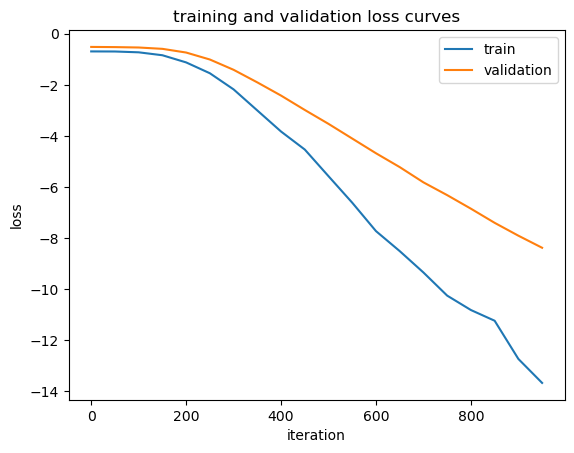

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

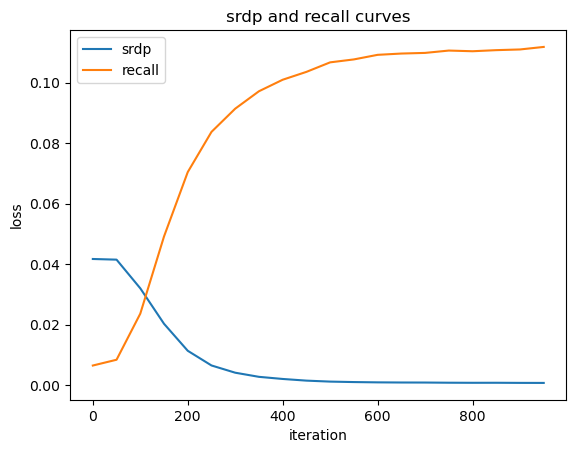

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

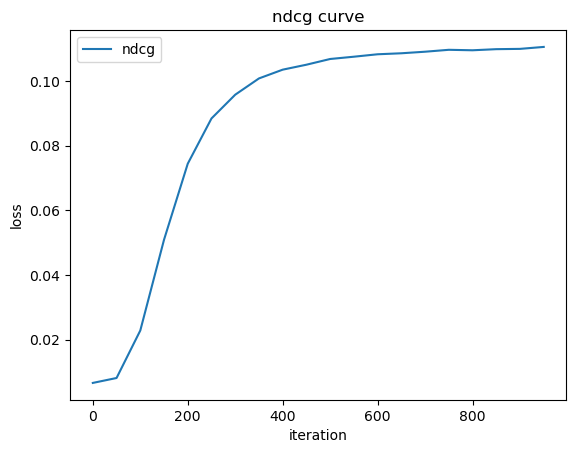

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('ndcg curve')
plt.legend()
plt.show()

In [ ]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov, test_div_sys_emb, test_div_usr_emb, test_div_sys_gnr, test_div_usr_gnr,  test_div_cov_itm_sys, test_div_cov_gnr_sys, test_div_cov_itm_usr, test_div_cov_gnr_usr= evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}, test_div_sys_emb@{K}: {round(test_div_sys_emb, 5)}, test_div_usr_emb@{K}: {round(test_div_usr_emb, 5)}, test_div_sys_gnr@{K}: {round(test_div_sys_gnr, 5)}, test_div_usr_gnr@{K}: {round(test_div_usr_gnr, 5)}, test_div_cov_itm_sys@{K}: {round(test_div_cov_itm_sys, 5)}, test_div_cov_gnr_sys@{K}: {round(test_div_cov_gnr_sys, 5)}, test_div_cov_itm_usr@{K}: {round(test_div_cov_itm_usr, 5)}, test_div_cov_gnr_usr@{K}: {round(test_div_cov_gnr_usr, 5)}]")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}, {round(test_div_sys_emb, 5)}, {round(test_div_usr_emb, 5)}, {round(test_div_sys_gnr, 5)}, {round(test_div_usr_gnr, 5)}, {round(test_div_cov_itm_sys, 5)}, {round(test_div_cov_gnr_sys, 5)}, {round(test_div_cov_itm_usr, 5)}, {round(test_div_cov_gnr_usr, 5)}")

[test_loss: -8.42222, test_recall@20: 0.10891, test_precision@20: 0.08172, test_ndcg@20: 0.11984, test_srdp@20: 0.00105, test_nov@20: 1.29902, test_div_sys_emb@20: 471.22208, test_div_usr_emb@20: 154.33927, test_div_sys_gnr@20: 187.6116, test_div_usr_gnr@20: 17.83036, test_div_cov_itm_sys@20: 0.06029, test_div_cov_gnr_sys@20: 1.0, test_div_cov_itm_usr@20: 0.00585, test_div_cov_gnr_usr@20: 0.71255]
-8.42222, 0.10891,0.08172,0.11984,0.00105,1.29902, 471.22208, 154.33927, 187.6116, 17.83036, 0.06029, 1.0, 0.00585, 0.71255


## Recommendations for a Given User

In [ ]:
#Load Model
from pathlib import Path

#text_model = 'roberta'
experiment = 'prox-movies'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "ml-1m/lightgcn_{0}.pth".format(experiment)

model = LightGCN(num_users, num_movies)
model.load_state_dict(torch.load(MODEL_PATH/MODEL_NAME)) # Set the model to inference mode

<All keys matched successfully>

In [ ]:
model.eval()
df = pd.read_csv(movie_path)
movieid_title = pd.Series(df.Title.values,index=df.MovieID).to_dict()
movieid_genres = pd.Series(df.Genres.values,index=df.MovieID).to_dict()

user_pos_items = get_user_positive_items(edge_index)

In [ ]:
def make_predictions(user_id, num_recs):
    user = user_mapping[user_id]
    e_u = model.users_emb.weight[user]
    scores = model.items_emb.weight @ e_u

    values, indices = torch.topk(scores, k=len(user_pos_items[user]) + num_recs)

    movies = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some movies that user {user_id} rated highly")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

    print()

    movies = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some suggested movies for user {user_id}")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

In [ ]:
USER_ID = 10
NUM_RECS = 10

make_predictions(USER_ID, NUM_RECS)

Here are some movies that user 10 rated highly
title: American Beauty (1999), genres: ['Comedy', 'Drama'] 
title: Star Wars: Episode V - The Empire Strikes Back (1980), genres: ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War'] 
title: Star Wars: Episode VI - Return of the Jedi (1983), genres: ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War'] 
title: Princess Bride, The (1987), genres: ['Action', 'Adventure', 'Comedy', 'Romance'] 
title: E.T. the Extra-Terrestrial (1982), genres: ["Children's", 'Drama', 'Fantasy', 'Sci-Fi'] 
title: Terminator 2: Judgment Day (1991), genres: ['Action', 'Sci-Fi', 'Thriller'] 
title: Star Wars: Episode IV - A New Hope (1977), genres: ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 
title: Back to the Future (1985), genres: ['Comedy', 'Sci-Fi'] 
title: Braveheart (1995), genres: ['Action', 'Drama', 'War'] 
title: Sixth Sense, The (1999), genres: ['Thriller'] 

Here are some suggested movies for user 10
title: Silence of the Lambs, The (1991), genres: ['Drama

In [ ]:
from pathlib import Path
data = 'ml-1m'
experiment = 'rec+prox-movies'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lightgcn_{0}.pth".format(experiment)
MODEL_SAVE_PATH =  MODEL_PATH / data / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/ml-1m/lightgcn_rec+prox-movies.pth


# LightGCN with Text


## Fusion at Propagation

In [54]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_text(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        #self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        #self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
       
        # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            reduced_text = self.dim_txt_reduction(self.text_embeddings)
            #reduced_image = self.dim_img_reduction(self.image_embeddings)

        self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        #self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Trainable user and item embeddings
        emb_trainable_users = self.users_emb.weight
        emb_trainable_items = self.items_emb.weight
        
        # Concatenate trainable embeddings with fixed embeddings for users and items
        emb_users = torch.cat([emb_trainable_users,self.text_embeddings[:num_users]], dim=1)  # Users: trainable + fixed
        emb_items = torch.cat([emb_trainable_items, self.text_embeddings[num_users:]], dim=1)  # Items: trainable + fixed

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


# Batch Training

In [87]:
# Mapping of experiment codes to model type and data variant
EXPERIMENT_CONFIGS = {
    "0": {"type": "base", "data_key": "0"},
    "1": {"type": "base", "data_key": "1"},
    "2": {"type": "base", "data_key": "2"},
    "3": {"type": "base", "data_key": "3"},
    "A": {"type": "A", "data_key": "0"},
    "B": {"type": "B", "data_key": "0"},
    "A1": {"type": "A", "data_key": "1"},
    "A2": {"type": "A", "data_key": "2"},
    "A3": {"type": "A", "data_key": "3"},
    "B1": {"type": "B", "data_key": "1"},
    "B2": {"type": "B", "data_key": "2"},
    "B3": {"type": "B", "data_key": "3"},
}


In [88]:
num_items = num_movies
def build_model(model_type):
    if model_type == "base":
        return LightGCN(num_users, num_items)
    elif model_type == "A":
        return LightGCN_text(num_users, num_items, text_embeddings=text_embeddings, embedding_dim=64)
    elif model_type == "B":
        return LightGCN_text(num_users, num_items, text_embeddings=text_embeddings2, embedding_dim=64)


In [89]:
DATASETS = {
    "0": {"train": train_edge_index0, "val": val_edge_index0, "test": test_edge_index0,
          "train_sparse": train_sparse_edge_index0, "val_sparse": val_sparse_edge_index0, "test_sparse": test_sparse_edge_index0},
    "1": {"train": train_edge_index1, "val": val_edge_index1, "test": test_edge_index1,
          "train_sparse": train_sparse_edge_index1, "val_sparse": val_sparse_edge_index1, "test_sparse": test_sparse_edge_index1},
    "2": {"train": train_edge_index2, "val": val_edge_index2, "test": test_edge_index2,
          "train_sparse": train_sparse_edge_index2, "val_sparse": val_sparse_edge_index2, "test_sparse": test_sparse_edge_index2},
    "3": {"train": train_edge_index3, "val": val_edge_index3, "test": test_edge_index3,
          "train_sparse": train_sparse_edge_index3, "val_sparse": val_sparse_edge_index3, "test_sparse": test_sparse_edge_index3},
}


In [90]:
def train_model(
    model, 
    train_edge_index, train_sparse_edge_index,
    val_edge_index, val_sparse_edge_index,
    test_edge_index, test_sparse_edge_index,
    iterations, k, lambd, exp_id,
    batch_size=1024,
    lr=1e-3,
    eval_every=50,
    decay_every=50,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
):
    import torch.optim as optim

    model = model.to(device)
    model.train()

    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

    train_losses = []

    for iter in range(iterations):
        users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(train_sparse_edge_index)

        # Mini-batch sampling
        user_idx, pos_item_idx, neg_item_idx = sample_mini_batch(batch_size, train_edge_index)
        user_idx, pos_item_idx, neg_item_idx = user_idx.to(device), pos_item_idx.to(device), neg_item_idx.to(device)

        users_emb_final = users_emb_final[user_idx]
        users_emb_0 = users_emb_0[user_idx]
        pos_items_emb_final = items_emb_final[pos_item_idx]
        pos_items_emb_0 = items_emb_0[pos_item_idx]
        neg_items_emb_final = items_emb_final[neg_item_idx]
        neg_items_emb_0 = items_emb_0[neg_item_idx]

        train_loss = bpr_loss(users_emb_final, users_emb_0,
                              pos_items_emb_final, pos_items_emb_0,
                              neg_items_emb_final, neg_items_emb_0,
                              lambd)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if iter % eval_every == 0:
            model.eval()
            val_loss, recall, precision, ndcg, srdp, nov, div_usr_emb, div_cov_itm_sys,  div_cov_gnr_usr = batch_evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], k, lambd)

            print(f"[{exp_id}][Iter {iter}/{iterations}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, recall@{k}: {round(recall, 5)}, precision@{k}: {round(precision, 5)}, ndcg@{k}: {round(ndcg, 5)}")

            model.train()

        if iter % decay_every == 0 and iter != 0:
            scheduler.step()

        train_losses.append(train_loss.item())

    # Final test evaluation
    model.eval()
    test_loss, recall, precision, ndcg, srdp, nov, div_usr_emb,  div_cov_itm_sys, div_cov_gnr_usr = batch_evaluation(
        model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], k, lambd)

    test_metrics = {
        "loss": round(test_loss, 5),
        "recall": round(recall, 5),
        "precision": round(precision, 5),
        "ndcg": round(ndcg, 5),
        "srdp": round(srdp, 5),
        "nov": round(nov, 5),
        "div_usr_emb": round(div_usr_emb, 5),
        "div_cov_itm_sys": round(div_cov_itm_sys, 5),
        "div_cov_gnr_usr": round(div_cov_gnr_usr, 5),
    }

    print(f"[TEST][{exp_id}] {test_metrics}")
    return model, test_metrics


In [91]:
import pandas as pd
from pathlib import Path
exp_path = Path("./results/ml-1m")
def log_metrics_to_csv(exp_id, test_metrics, save_path="./results/ml-1m/experiment_results.csv"):
    row = {"experiment": exp_id}
    row.update(test_metrics)

    df = pd.DataFrame([row])

    save_path = Path(save_path)
    if save_path.exists():
        df.to_csv(save_path, mode="a", header=False, index=False)
    else:
        df.to_csv(save_path, mode="w", header=True, index=False)

    print(f"✅ Logged results for {exp_id} to {save_path}")


In [92]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


for exp_id, config in EXPERIMENT_CONFIGS.items():
    print(f"\n--- Training experiment {exp_id} ---")

    # Build model
    model = build_model(config["type"]).to(device)
    model.train()

    # Get data
    ds = DATASETS[config["data_key"]]
    train_edge_index = ds["train"].to(device)
    val_edge_index = ds["val"].to(device)
    test_edge_index = ds["test"].to(device)
    train_sparse = ds["train_sparse"].to(device)
    val_sparse = ds["val_sparse"].to(device)
    test_sparse = ds["test_sparse"].to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

    # Call your training loop
    trained_model, test_metrics = train_model(
        model, train_edge_index, train_sparse, val_edge_index, val_sparse,
        test_edge_index, test_sparse, ITERATIONS, K, LAMBDA, exp_id
    )

    # Save the model
    model_path = f"./models/ml-1m/lightgcn_{exp_id}.pth"
    torch.save(trained_model.state_dict(), model_path)
    print(f"Saved model to {model_path}")
    
    # Log to CSV
    log_metrics_to_csv(exp_id, test_metrics)


Using device cpu.

--- Training experiment 0 ---
[0][Iter 0/1000] train_loss: -0.69123, val_loss: -0.53202, recall@20: 0.00562, precision@20: 0.00438, ndcg@20: 0.00533
[0][Iter 50/1000] train_loss: -0.69701, val_loss: -0.53998, recall@20: 0.00797, precision@20: 0.00546, ndcg@20: 0.00724
[0][Iter 100/1000] train_loss: -0.75045, val_loss: -0.56933, recall@20: 0.02977, precision@20: 0.01815, ndcg@20: 0.02632
[0][Iter 150/1000] train_loss: -0.92568, val_loss: -0.66736, recall@20: 0.05883, precision@20: 0.04019, ndcg@20: 0.05687
[0][Iter 200/1000] train_loss: -1.2933, val_loss: -0.90261, recall@20: 0.07955, precision@20: 0.0564, ndcg@20: 0.07958
[0][Iter 250/1000] train_loss: -1.87695, val_loss: -1.30548, recall@20: 0.09539, precision@20: 0.06524, ndcg@20: 0.09411
[0][Iter 300/1000] train_loss: -2.72313, val_loss: -1.84327, recall@20: 0.10396, precision@20: 0.06897, ndcg@20: 0.10003
[0][Iter 350/1000] train_loss: -3.43638, val_loss: -2.45018, recall@20: 0.11081, precision@20: 0.07147, ndcg@

## Fusion at Initialization

In [86]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F
    
class LightGCN_text(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        #self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.text_embeddings = nn.Parameter(self.dim_txt_reduction(self.text_embeddings))
               
        # Concatenate graph, text, and image embeddings
        self.users_emb.weight = nn.Parameter(torch.cat([self.users_emb.weight, self.text_embeddings[:self.num_users]], dim=1))
        self.items_emb.weight = nn.Parameter(torch.cat([self.items_emb.weight, self.text_embeddings[self.num_users:]], dim=1))
        
        # Fuse the grap and text embeddings by tensor addition
        # self.users_emb.weight = nn.Parameter(self.users_emb.weight + self.text_embeddings[:self.num_users])
        # self.items_emb.weight = nn.Parameter(self.items_emb.weight + self.text_embeddings[self.num_users:])
        
       # Reducing dimensionality of concatenated embeddings
        #self.dim_usr_reduction = nn.Linear(self.users_emb.weight.shape[1], self.embedding_dim)
        #self.users_emb.weight = nn.Parameter(self.dim_usr_reduction(self.users_emb.weight))
        #self.dim_itm_reduction = nn.Linear(self.items_emb.weight.shape[1], self.embedding_dim)
        #self.items_emb.weight = nn.Parameter(self.dim_itm_reduction(self.items_emb.weight))

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [149]:
# Initialize the model
model = LightGCN_text(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, embedding_dim=64)

In [150]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [151]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [152]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []
val_div_sys_emb = []
val_div_usr_emb = []
val_div_sys_gnr = []
val_div_usr_gnr = []
val_div_cov_itm_sys = []
val_div_cov_gnr_sys = []
val_div_cov_itm_usr = []
val_div_cov_gnr_usr = []

for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov, div_sys_emb, div_usr_emb, div_sys_gnr, div_usr_gnr, div_cov_itm_sys, div_cov_gnr_sys, div_cov_itm_usr, div_cov_gnr_usr = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}, val_div_sys_emb: {round(div_sys_emb, 5)}, val_div_usr_emb: {round(div_usr_emb, 5)}, val_div_sys_gnr: {round(div_sys_gnr, 5)}, val_div_usr_gnr: {round(div_usr_gnr, 5)}, val_div_cov_itm_sys: {round(div_cov_itm_sys, 5)}, val_div_cov_gnr_sys: {round(div_cov_gnr_sys, 5)}, val_div_cov_itm_usr: {round(div_cov_itm_usr, 5)}, val_div_cov_gnr_usr: {round(div_cov_gnr_usr, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        val_div_sys_emb.append(div_sys_emb)
        val_div_usr_emb.append(div_usr_emb)
        val_div_sys_gnr.append(div_sys_gnr)
        val_div_usr_gnr.append(div_usr_gnr)
        val_div_cov_itm_sys.append(div_cov_itm_sys)
        val_div_cov_gnr_sys.append(div_cov_gnr_sys)
        val_div_cov_itm_usr.append(div_cov_itm_usr)
        val_div_cov_gnr_usr.append(div_cov_gnr_usr)
        
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69104, val_loss: -0.53456, val_recall@20: 0.00605, val_precision@20: 0.00439, val_ndcg@20: 0.00611, val_srdp@20: 0.04158, val_nov@20: 7.11883, val_div_sys_emb: 480.84467, val_div_usr_emb: 0.88609, val_div_sys_gnr: 21.64276, val_div_usr_gnr: 12.30807, val_div_cov_itm_sys: 0.99883, val_div_cov_gnr_sys: 1.0, val_div_cov_itm_usr: 0.00585, val_div_cov_gnr_usr: 0.61514
[Iteration 50/1000] train_loss: -0.69523, val_loss: -0.54164, val_recall@20: 0.00866, val_precision@20: 0.00536, val_ndcg@20: 0.00766, val_srdp@20: 0.0412, val_nov@20: 7.08833, val_div_sys_emb: 470.55984, val_div_usr_emb: 0.88525, val_div_sys_gnr: 21.80157, val_div_usr_gnr: 12.17097, val_div_cov_itm_sys: 0.99854, val_div_cov_gnr_sys: 1.0, val_div_cov_itm_usr: 0.00585, val_div_cov_gnr_usr: 0.61626
[Iteration 100/1000] train_loss: -0.73583, val_loss: -0.56264, val_recall@20: 0.02774, val_precision@20: 0.01627, val_ndcg@20: 0.0251, val_srdp@20: 0.03089, val_nov@20: 6.36315, val_div_sys_emb: 495.2

In [ ]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov, test_div_sys_emb, test_div_usr_emb, test_div_sys_gnr, test_div_usr_gnr,  test_div_cov_itm_sys, test_div_cov_gnr_sys, test_div_cov_itm_usr, test_div_cov_gnr_usr= evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}, test_div_sys_emb@{K}: {round(test_div_sys_emb, 5)}, test_div_usr_emb@{K}: {round(test_div_usr_emb, 5)}, test_div_sys_gnr@{K}: {round(test_div_sys_gnr, 5)}, test_div_usr_gnr@{K}: {round(test_div_usr_gnr, 5)}, test_div_cov_itm_sys@{K}: {round(test_div_cov_itm_sys, 5)}, test_div_cov_gnr_sys@{K}: {round(test_div_cov_gnr_sys, 5)}, test_div_cov_itm_usr@{K}: {round(test_div_cov_itm_usr, 5)}, test_div_cov_gnr_usr@{K}: {round(test_div_cov_gnr_usr, 5)}]")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}, {round(test_div_sys_emb, 5)}, {round(test_div_usr_emb, 5)}, {round(test_div_sys_gnr, 5)}, {round(test_div_usr_gnr, 5)}, {round(test_div_cov_itm_sys, 5)}, {round(test_div_cov_gnr_sys, 5)}, {round(test_div_cov_itm_usr, 5)}, {round(test_div_cov_gnr_usr, 5)}")

[test_loss: -10.57993, test_recall@20: 0.13231, test_precision@20: 0.08153, test_ndcg@20: 0.1309, test_srdp@20: 0.00099, test_nov@20: 1.28617, test_div_sys_emb@20: 482.60974, test_div_usr_emb@20: 0.01247, test_div_sys_gnr@20: 187.62993, test_div_usr_gnr@20: 15.98004, test_div_cov_itm_sys@20: 0.05619, test_div_cov_gnr_sys@20: 1.0, test_div_cov_itm_usr@20: 0.00585, test_div_cov_gnr_usr@20: 0.65056]
-10.57993, 0.13231,0.08153,0.1309,0.00099,1.28617, 482.60974, 0.01247, 187.62993, 15.98004, 0.05619, 1.0, 0.00585, 0.65056


## Recommendations for a Given User

In [ ]:
#Load model
from pathlib import Path
data = 'ml-1m'
text_model = 'roberta'
experiment = 'div_rec_prox_poster_genre_movie_B3'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lightgcn_{0}_{1}.pth".format(experiment,text_model)

model = LightGCN_text(num_users, num_movies, text_embeddings)
model.load_state_dict(torch.load(MODEL_PATH/data/text_model/MODEL_NAME)) # Set the model to inference mode

<All keys matched successfully>

In [866]:
model.eval()
df = pd.read_csv(movie_path)
movieid_title = pd.Series(df.Title.values,index=df.MovieID).to_dict()
movieid_genres = pd.Series(df.Genres.values,index=df.MovieID).to_dict()

user_pos_items = get_user_positive_items(edge_index)

In [867]:
def make_predictions(user_id, num_recs):
    user = user_mapping[user_id]
    e_u = model.users_emb.weight[user]
    scores = model.items_emb.weight @ e_u

    values, indices = torch.topk(scores, k=len(user_pos_items[user]) + num_recs)

    movies = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some movies that user {user_id} rated highly")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

    print()

    movies = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some suggested movies for user {user_id}")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

In [868]:
scores = model.items_emb.weight @ model.users_emb.weight[user_mapping[10]]
values, indices = torch.topk(scores, k=len(user_pos_items[user_mapping[10]]) + 10)

rec_movies = [index.cpu().item() for index in indices if index in user_pos_items[user_mapping[10]]][:10]
movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in rec_movies]
titles = [movieid_title[id] for id in movie_ids]
genres = [movieid_genres[id] for id in movie_ids]

In [869]:
USER_ID = 10
NUM_RECS = 10

make_predictions(USER_ID, NUM_RECS)

Here are some movies that user 10 rated highly
title: American Beauty (1999), genres: ['Comedy', 'Drama'] 
title: Star Wars: Episode VI - Return of the Jedi (1983), genres: ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War'] 
title: Star Wars: Episode V - The Empire Strikes Back (1980), genres: ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War'] 
title: Star Wars: Episode IV - A New Hope (1977), genres: ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 
title: Sixth Sense, The (1999), genres: ['Thriller'] 
title: L.A. Confidential (1997), genres: ['Crime', 'Film-Noir', 'Mystery', 'Thriller'] 
title: Back to the Future (1985), genres: ['Comedy', 'Sci-Fi'] 
title: Toy Story (1995), genres: ['Animation', "Children's", 'Comedy'] 
title: Men in Black (1997), genres: ['Action', 'Adventure', 'Comedy', 'Sci-Fi'] 
title: E.T. the Extra-Terrestrial (1982), genres: ["Children's", 'Drama', 'Fantasy', 'Sci-Fi'] 

Here are some suggested movies for user 10
title: Saving Private Ryan (1998), genres: ['Actio

In [380]:
users.iloc[10]['Persona']

'This female educator is likely analytical and detail-oriented in her professional life, applying critical thinking skills to complex problems, which may translate to a nuanced viewing experience where she appreciates the intricacies of crime and war dramas. Her movie preferences suggest an interest in thought-provoking stories that explore the human condition, perhaps reflecting a desire for intellectual stimulation outside of her work.'

In [154]:

from pathlib import Path
data = 'ml-1m'
text_model = 'roberta'
experiment = 'div_prox_poster_genre_A2'

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lightgcn_{0}_{1}.pth".format(experiment,text_model)
MODEL_SAVE_PATH = MODEL_PATH / data / text_model / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/ml-1m/roberta/lightgcn_div_prox_poster_genre_A2_roberta.pth


# Batch Testing K

In [93]:
import os

def load_models_from_directory(directory, device):
    models = []
    model_names = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".pt") or filename.endswith(".pth"):
            path = os.path.join(directory, filename)
            model_name = os.path.splitext(filename)[0].split('_')[1]
            if model_name.isdigit():
                type = 'base'
            elif 'A' in model_name:
                type = 'A'
            else:
                type = 'B'
            model = model_builder(type) 
            state_dict = torch.load(path, map_location=device)
            model.load_state_dict(state_dict) 
            model = model.to(device)
            model.eval()  # Set to eval mode immediately
            
            models.append(model)
            model_names.append(model_name)
    
    return models, model_names

def model_builder(type):
    if type == 'base':
        return LightGCN(num_users=num_users, num_items=num_movies)
    elif type == 'A':   
        return LightGCN_text(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, embedding_dim=64)
    elif type == 'B':   
        return LightGCN_text(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings2, embedding_dim=64)

def evaluate_model_on_ks(model, test_edge_index, test_sparse_edge_index, train_val_edges, ks, lambd, device):
    model.eval()
    test_edge_index = test_edge_index.to(device)
    test_sparse_edge_index = test_sparse_edge_index.to(device)

    results = {}

    for k in ks:
        metrics = batch_evaluation(
            model, test_edge_index, test_sparse_edge_index, train_val_edges, k, lambd
        )

        metric_names = [
            "loss", "recall", "precision", "ndcg", "srdp", "nov",
            "div_usr_emb", "div_cov_itm_sys",   "div_cov_gnr_usr"
        ]

        results[k] = {name: round(val, 5) for name, val in zip(metric_names, metrics)}

    return results

def batch_evaluate_models(models, model_names, ks, lambd, device):
    all_results = {}

    for model, name in zip(models, model_names):
       
        print(f"\n=== Evaluating Model: {name} ===")
            # Identify type based on name
            
        if "1" in name:
            test_edge_index, test_sparse_edge_index, train_val_edges = test_edge_index1, test_sparse_edge_index1, [train_edge_index1, val_edge_index1]
        elif "2" in name:
            test_edge_index, test_sparse_edge_index, train_val_edges = test_edge_index2, test_sparse_edge_index2, [train_edge_index2, val_edge_index2]
        elif "3" in name:
            test_edge_index, test_sparse_edge_index, train_val_edges = test_edge_index3, test_sparse_edge_index3, [train_edge_index3, val_edge_index3]
        else:
            test_edge_index, test_sparse_edge_index, train_val_edges = test_edge_index0, test_sparse_edge_index0, [train_edge_index0, val_edge_index0]
       
        
        results = evaluate_model_on_ks(model, test_edge_index, test_sparse_edge_index, train_val_edges, ks, lambd, device)
        all_results[name] = results

    return all_results

def organize_results(all_results, ks, metric_names):
    # a) One table per K
    tables_per_k = {}
    for k in ks:
        data = []
        for model_name, model_results in all_results.items():
            metrics = model_results[k]
            data.append([model_name] + [metrics[m] for m in metric_names])
        df = pd.DataFrame(data, columns=["Model"] + metric_names)
        tables_per_k[k] = df

    # b) One table per Metric
    tables_per_metric = {}
    for metric in metric_names:
        data = []
        for model_name, model_results in all_results.items():
            row = [model_name]
            for k in ks:
                row.append(model_results[k][metric])
            data.append(row)
        df = pd.DataFrame(data, columns=["Model"] + [f"K={k}" for k in ks])
        tables_per_metric[metric] = df

    return tables_per_k, tables_per_metric

In [94]:
directory = "./models/ml-1m"  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ks = [5, 10, 20, 50]
metric_names = [
            "loss", "recall", "precision", "ndcg", "srdp", "nov",
            "div_usr_emb", "div_cov_itm_sys",   "div_cov_gnr_usr"
]
LAMBDA = 1e-6

In [95]:
# Assume you already have these from somewhere
# test_edge_index, test_sparse_edge_index, train_edge_index, val_edge_index, LAMBDA

models, model_names = load_models_from_directory(directory, device)
all_results = batch_evaluate_models(models, model_names, ks, LAMBDA, device)
tables_per_k, tables_per_metric = organize_results(all_results, ks, metric_names)


=== Evaluating Model: A3 ===

=== Evaluating Model: A2 ===

=== Evaluating Model: A1 ===

=== Evaluating Model: B1 ===

=== Evaluating Model: B3 ===

=== Evaluating Model: B2 ===

=== Evaluating Model: 3 ===

=== Evaluating Model: 2 ===

=== Evaluating Model: 0 ===

=== Evaluating Model: 1 ===

=== Evaluating Model: B ===

=== Evaluating Model: A ===


In [96]:
def filter_and_reorder_tables(tables_per_k, tables_per_metric, selected_metrics):
    def reorder_models(df):
        def sort_key(name):
            # 1. Absolute "0"
            if name == "0":
                return (0, 0)

            # 2. Pure "A" or "B"
            if name == "A":
                return (1, 0)
            if name == "B":
                return (2, 0)

            # 3. Just digit ("0", "1", "2", "3")
            if name.isdigit():
                return (3, int(name))

            # 4. A0, A1, A2, A3
            if name.startswith('A') and name[1:].isdigit():
                return (4, int(name[1:]))

            # 5. B0, B1, B2, B3
            if name.startswith('B') and name[1:].isdigit():
                return (5, int(name[1:]))

            # fallback if unexpected
            return (6, 0)

        df["sort_key"] = df["Model"].apply(sort_key)
        df = df.sort_values("sort_key").drop(columns=["sort_key"])
        return df

    new_tables_per_k = {}
    for k, df in tables_per_k.items():
        filtered_df = df[["Model"] + selected_metrics]
        filtered_df = reorder_models(filtered_df)
        new_tables_per_k[k] = filtered_df

    new_tables_per_metric = {}
    for metric, df in tables_per_metric.items():
        if metric not in selected_metrics:
            continue  # Skip unwanted metrics
        filtered_df = df.copy()
        filtered_df = reorder_models(filtered_df)
        new_tables_per_metric[metric] = filtered_df

    return new_tables_per_k, new_tables_per_metric


In [97]:
selected_metrics = [
    "recall", "precision", "ndcg", "srdp", 
    "nov", "div_usr_emb", "div_cov_itm_sys", "div_cov_gnr_usr"
]

tables_per_k, tables_per_metric = filter_and_reorder_tables(
    tables_per_k, tables_per_metric, selected_metrics
)

In [98]:
# (Optional) Save tables
for k, df in tables_per_k.items():
    df.to_csv(f"./results/ml-1m/K/results_per_k_K{k}.csv", index=False)

for metric, df in tables_per_metric.items():
    df.to_csv(f"./results/ml-1m/metrics/results_per_metric_{metric}.csv", index=False)

In [178]:
import matplotlib.pyplot as plt

def plot_per_metric(tables_per_metric, save_dir=None):
    """
    For each metric, plot model performances across different Ks.
    """
    for metric, df in tables_per_metric.items():
        plt.figure(figsize=(8, 6))
        
        for idx, row in df.iterrows():
            model_name = row["Model"]
            ks = [int(col.split('=')[1]) for col in df.columns[1:]]
            values = row.values[1:].astype(float)
            plt.plot(ks, values, marker='o', label=model_name)

        plt.title(f"Performance vs K for {metric}")
        plt.xlabel("K")
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        if save_dir:
            plt.savefig(f"{save_dir}/metric_{metric}.png")
        
        plt.show()

def plot_per_k(tables_per_k, save_dir=None):
    """
    For each K, plot model performances across different metrics.
    """
    for k, df in tables_per_k.items():
        plt.figure(figsize=(12, 6))

        metrics = df.columns[1:]
        
        for idx, row in df.iterrows():
            model_name = row["Model"]
            values = row.values[1:].astype(float)
            plt.plot(metrics, values, marker='o', label=model_name)

        plt.title(f"Performance across Metrics at K={k}")
        plt.xlabel("Metrics")
        plt.ylabel("Score")
        plt.xticks(rotation=45, ha="right")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        if save_dir:
            plt.savefig(f"{save_dir}/k_{k}.png")

        plt.show()


In [ ]:
# To just show plots:
plot_per_metric(tables_per_metric)
plot_per_k(tables_per_k)

# To also save to disk:
plot_per_metric(tables_per_metric, save_dir="./plots")
plot_per_k(tables_per_k, save_dir="./plots")

# LightGCN with Image


## Fusion at Propagation

In [966]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_image(MessagePassing):

    def __init__(self, num_users, num_items, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        #self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        #self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
       
        # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            #reduced_text = self.dim_txt_reduction(self.text_embeddings)
            reduced_image = self.dim_img_reduction(self.image_embeddings)

        #self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Trainable user and item embeddings
        emb_trainable_users = self.users_emb.weight
        emb_trainable_items = self.items_emb.weight
        
        # Concatenate trainable embeddings with fixed embeddings for users and items
        emb_users = torch.cat([emb_trainable_users,self.image_embeddings[:num_users]], dim=1)  # Users: trainable + fixed
        emb_items = torch.cat([emb_trainable_items, self.image_embeddings[num_users:]], dim=1)  # Items: trainable + fixed

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Fusion at Initialization

In [846]:

# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_image(MessagePassing):

    def __init__(self, num_users, num_items, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        #self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
        self.image_embeddings = nn.Parameter(self.dim_img_reduction(self.image_embeddings))

        # Concatenate graph, text, and image embeddings
        self.users_emb.weight = nn.Parameter(torch.cat([self.users_emb.weight, self.image_embeddings[:self.num_users]], dim=1))
        self.items_emb.weight = nn.Parameter(torch.cat([self.items_emb.weight, self.image_embeddings[self.num_users:]], dim=1))
        
        # Reducing dimensionality of concatenated embeddings
        self.dim_usr_reduction = nn.Linear(self.users_emb.weight.shape[1], self.embedding_dim)
        self.users_emb.weight = nn.Parameter(self.dim_usr_reduction(self.users_emb.weight))
        self.dim_itm_reduction = nn.Linear(self.items_emb.weight.shape[1], self.embedding_dim)
        self.items_emb.weight = nn.Parameter(self.dim_itm_reduction(self.items_emb.weight))

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [997]:
# Initialize the model
model = LightGCN_image(num_users=num_users, num_items=num_movies, image_embeddings=image_embeddings, embedding_dim=64)

In [998]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [999]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [1000]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []


for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69122, val_loss: -0.68403, val_recall@20: 0.00079, val_precision@20: 0.00064, val_ndcg@20: 0.001, val_srdp@20: 0.04458, val_nov@20: 7.80389
[Iteration 50/1000] train_loss: -0.6917, val_loss: -0.68447, val_recall@20: 0.00082, val_precision@20: 0.00073, val_ndcg@20: 0.00111, val_srdp@20: 0.0445, val_nov@20: 7.78829
[Iteration 100/1000] train_loss: -0.69254, val_loss: -0.68492, val_recall@20: 0.00122, val_precision@20: 0.00091, val_ndcg@20: 0.00132, val_srdp@20: 0.04425, val_nov@20: 7.74377
[Iteration 150/1000] train_loss: -0.69429, val_loss: -0.6857, val_recall@20: 0.00489, val_precision@20: 0.00274, val_ndcg@20: 0.00377, val_srdp@20: 0.04247, val_nov@20: 7.55659
[Iteration 200/1000] train_loss: -0.69781, val_loss: -0.68766, val_recall@20: 0.03324, val_precision@20: 0.01216, val_ndcg@20: 0.02449, val_srdp@20: 0.03078, val_nov@20: 6.40727
[Iteration 250/1000] train_loss: -0.7059, val_loss: -0.69224, val_recall@20: 0.08, val_precision@20: 0.02934, val_ndcg

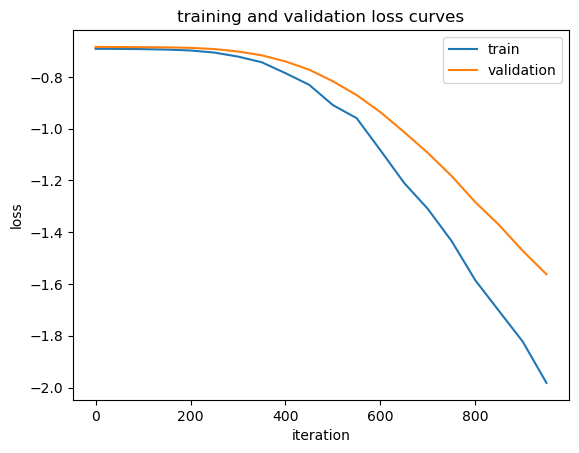

In [1001]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

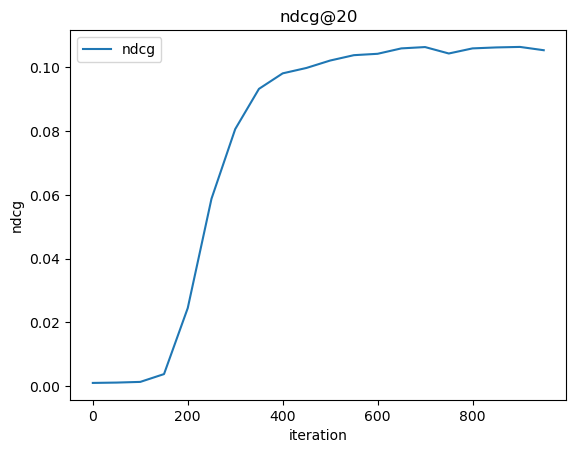

In [1002]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_ndcg))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('ndcg')
plt.title('ndcg@20')
plt.legend()
plt.show()

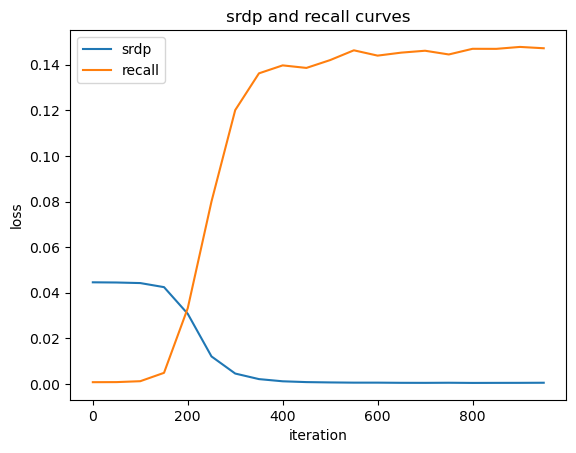

In [1003]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

In [1004]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}")

[test_loss: -1.71875, test_recall@20: 0.14526, test_precision@20: 0.04775, test_ndcg@20: 0.11085, test_srdp@20: 0.0006, test_nov@20: 0.87207
-1.71875, 0.14526,0.04775,0.11085,0.0006,0.87207


# LightGCN with Text & Image

## Fusion at Propagation

In [953]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_combined(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
       
        # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            reduced_text = self.dim_txt_reduction(self.text_embeddings)
            reduced_image = self.dim_img_reduction(self.image_embeddings)

        self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

        # Concatenate text and image embeddings without making them trainable
        with torch.no_grad():
            self.concatenated_users = torch.cat([self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1)
            self.concatenated_items = torch.cat([self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1)

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Trainable user and item embeddings
        emb_trainable_users = self.users_emb.weight
        emb_trainable_items = self.items_emb.weight
        
        # Concatenate trainable embeddings with fixed embeddings for users and items
        emb_users = torch.cat([emb_trainable_users,self.concatenated_users], dim=1)  # Users: trainable + fixed
        emb_items = torch.cat([emb_trainable_items, self.concatenated_items], dim=1)  # Items: trainable + fixed

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Fusion at Initialization

In [907]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_combined(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
        self.text_embeddings = nn.Parameter(self.dim_txt_reduction(self.text_embeddings))
        self.image_embeddings = nn.Parameter(self.dim_img_reduction(self.image_embeddings))

        # Concatenate graph, text, and image embeddings
        self.users_emb.weight = nn.Parameter(torch.cat([self.users_emb.weight, self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1))
        self.items_emb.weight = nn.Parameter(torch.cat([self.items_emb.weight, self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1))
        
        # Reducing dimensionality of concatenated embeddings
        #self.dim_usr_reduction = nn.Linear(self.users_emb.weight.shape[1], self.embedding_dim)
        #self.users_emb.weight = nn.Parameter(self.dim_usr_reduction(self.users_emb.weight))
        #self.dim_itm_reduction = nn.Linear(self.items_emb.weight.shape[1], self.embedding_dim)
        #self.items_emb.weight = nn.Parameter(self.dim_itm_reduction(self.items_emb.weight))


    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [1005]:
# Initialize the model
model = LightGCN_combined(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, image_embeddings=image_embeddings, embedding_dim=64)

In [1006]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [1007]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [1008]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []


for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69101, val_loss: -0.68404, val_recall@20: 0.00216, val_precision@20: 0.0011, val_ndcg@20: 0.00139, val_srdp@20: 0.0445, val_nov@20: 7.79721
[Iteration 50/1000] train_loss: -0.69195, val_loss: -0.68448, val_recall@20: 0.00153, val_precision@20: 0.00082, val_ndcg@20: 0.00089, val_srdp@20: 0.04452, val_nov@20: 7.80154
[Iteration 100/1000] train_loss: -0.69257, val_loss: -0.68497, val_recall@20: 0.00139, val_precision@20: 0.00064, val_ndcg@20: 0.00081, val_srdp@20: 0.04437, val_nov@20: 7.77682
[Iteration 150/1000] train_loss: -0.6942, val_loss: -0.68577, val_recall@20: 0.00848, val_precision@20: 0.00238, val_ndcg@20: 0.00462, val_srdp@20: 0.0425, val_nov@20: 7.56865
[Iteration 200/1000] train_loss: -0.69766, val_loss: -0.68782, val_recall@20: 0.04152, val_precision@20: 0.01143, val_ndcg@20: 0.02491, val_srdp@20: 0.03036, val_nov@20: 6.35738
[Iteration 250/1000] train_loss: -0.70506, val_loss: -0.69248, val_recall@20: 0.08526, val_precision@20: 0.02697, val

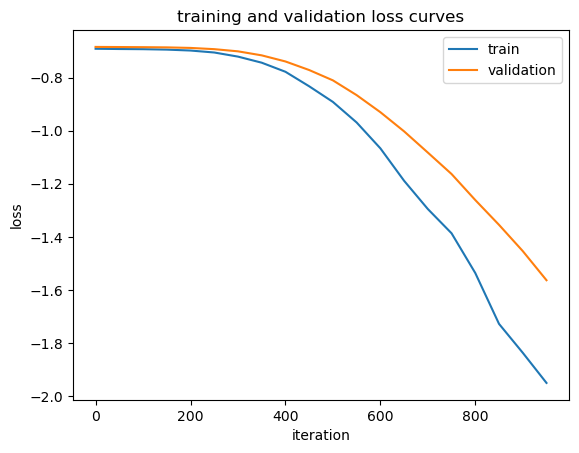

In [1009]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

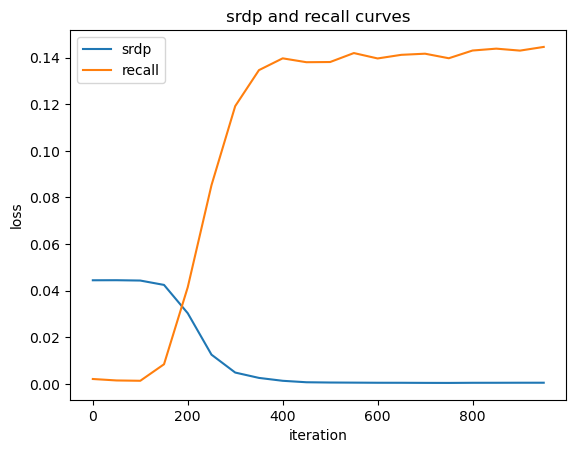

In [1011]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

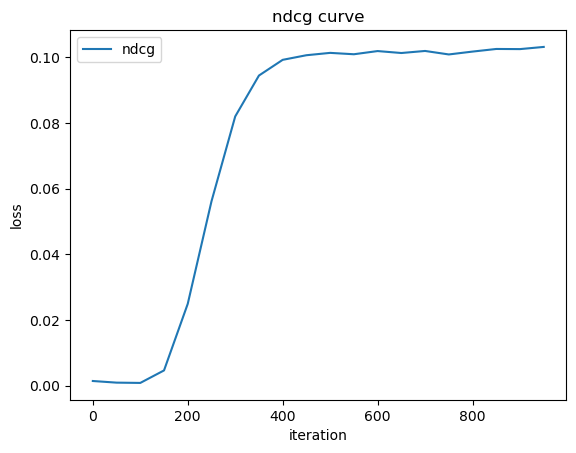

In [1012]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('ndcg curve')
plt.legend()
plt.show()

In [1013]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}")

[test_loss: -1.70694, test_recall@20: 0.14843, test_precision@20: 0.04757, test_ndcg@20: 0.10909, test_srdp@20: 0.00066, test_nov@20: 0.86816
-1.70694, 0.14843,0.04757,0.10909,0.00066,0.86816


# LightGCN no ID, with Text & Image

## Fusion at Propagation

In [ ]:
# Integrating the embeddings at the forward pass
import torch.nn.functional as F

class LightGCN_combined(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops
        
        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings
        self.image_embeddings = image_embeddings

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_users, embedding_dim)
        self.items_emb = nn.Embedding(num_items, embedding_dim)

        # Dimensionality reduction layers for image embeddings
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], embedding_dim)
    
        # Initialize the embedding weights
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index: SparseTensor):
        # Transform image embeddings to match graph embedding dimensions
        #self.txt_embeddings = self.dim_txt_reduction(self.text_embeddings)
        #self.image_embeddings = self.dim_img_reduction(self.image_embeddings)
        
        # Concatenate graph embeddings with transformed text and image embeddings
        user_embeddings = torch.cat([self.users_emb.weight, self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1)
        item_embeddings = torch.cat([self.items_emb.weight, self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1)

        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Fusion at Initialization

In [940]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_combined_noID(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
        #self.text_embeddings = nn.Parameter(self.dim_txt_reduction(self.text_embeddings))
        #self.image_embeddings = nn.Parameter(self.dim_img_reduction(self.image_embeddings))

        # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            reduced_text = self.dim_txt_reduction(self.text_embeddings)
            reduced_image = self.dim_img_reduction(self.image_embeddings)

        self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

        # Concatenate text and image embeddings without making them trainable
        with torch.no_grad():
            concatenated_users = torch.cat([self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1)
            concatenated_items = torch.cat([self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1)

        self.users_embeddings = nn.Parameter(concatenated_users, requires_grad=False)
        self.items_embeddings = nn.Parameter(concatenated_items, requires_grad=False)

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [941]:
# Initialize the model
model = LightGCN_combined_noID(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, image_embeddings=image_embeddings, embedding_dim=64)

In [942]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [943]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [944]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []


for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69125, val_loss: -0.684, val_recall@20: 0.00155, val_precision@20: 0.00146, val_ndcg@20: 0.00184, val_srdp@20: 0.04451, val_nov@20: 7.79282
[Iteration 50/1000] train_loss: -0.69163, val_loss: -0.68452, val_recall@20: 0.00117, val_precision@20: 0.00128, val_ndcg@20: 0.00138, val_srdp@20: 0.04447, val_nov@20: 7.78707
[Iteration 100/1000] train_loss: -0.69266, val_loss: -0.68494, val_recall@20: 0.00117, val_precision@20: 0.00128, val_ndcg@20: 0.00135, val_srdp@20: 0.04426, val_nov@20: 7.7589
[Iteration 150/1000] train_loss: -0.69425, val_loss: -0.68582, val_recall@20: 0.0145, val_precision@20: 0.00375, val_ndcg@20: 0.00802, val_srdp@20: 0.04163, val_nov@20: 7.49615
[Iteration 200/1000] train_loss: -0.69833, val_loss: -0.68807, val_recall@20: 0.04766, val_precision@20: 0.01335, val_ndcg@20: 0.03339, val_srdp@20: 0.02868, val_nov@20: 6.09106
[Iteration 250/1000] train_loss: -0.7074, val_loss: -0.69326, val_recall@20: 0.09838, val_precision@20: 0.02797, val_

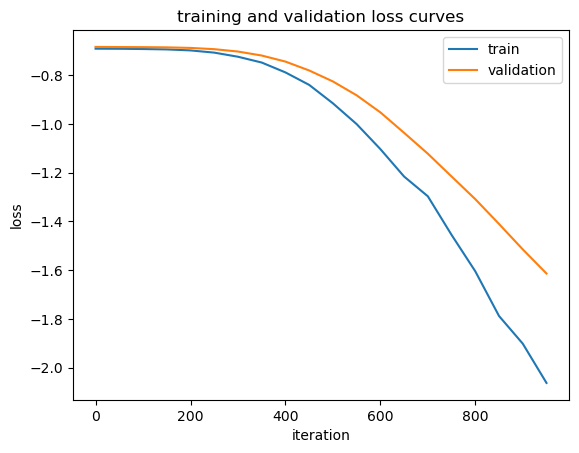

In [945]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

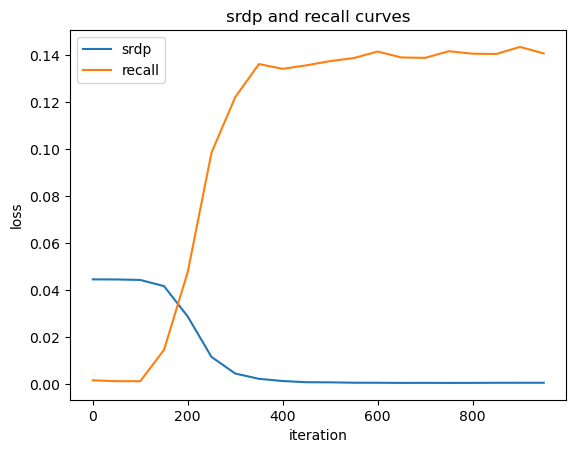

In [946]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

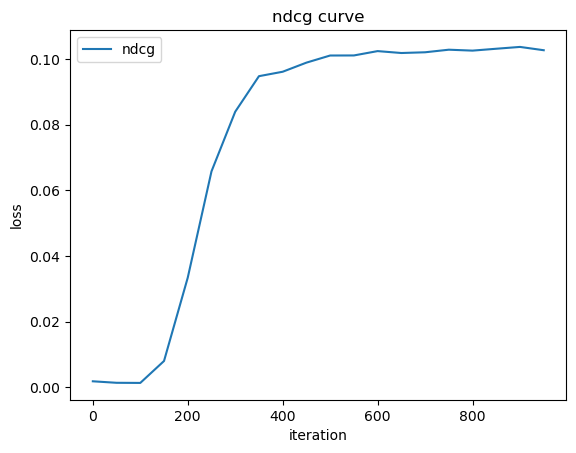

In [947]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('ndcg curve')
plt.legend()
plt.show()

In [930]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}")

[test_loss: -1.85296, test_recall@20: 0.14805, test_precision@20: 0.04856, test_ndcg@20: 0.11317, test_srdp@20: 0.00054, test_nov@20: 0.85347
-1.85296, 0.14805,0.04856,0.11317,0.00054,0.85347


# LightGCN no ID, with Text

## Fusion at Propagation

In [ ]:
# Integrating the embeddings at the forward pass
import torch.nn.functional as F

class LightGCN_combined(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops
        
        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings
        self.image_embeddings = image_embeddings

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_users, embedding_dim)
        self.items_emb = nn.Embedding(num_items, embedding_dim)

        # Dimensionality reduction layers for image embeddings
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], embedding_dim)
    
        # Initialize the embedding weights
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index: SparseTensor):
        # Transform image embeddings to match graph embedding dimensions
        #self.txt_embeddings = self.dim_txt_reduction(self.text_embeddings)
        #self.image_embeddings = self.dim_img_reduction(self.image_embeddings)
        
        # Concatenate graph embeddings with transformed text and image embeddings
        user_embeddings = torch.cat([self.users_emb.weight, self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1)
        item_embeddings = torch.cat([self.items_emb.weight, self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1)

        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Fusion at Initialization

In [931]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_text_noID(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
        #self.text_embeddings = nn.Parameter(self.dim_txt_reduction(self.text_embeddings))
        #self.image_embeddings = nn.Parameter(self.dim_img_reduction(self.image_embeddings))

       # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            reduced_text = self.dim_txt_reduction(self.text_embeddings)
            #reduced_image = self.dim_img_reduction(self.image_embeddings)

        self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        #self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

        # Concatenate text and image embeddings without making them trainable
        self.users_embeddings = nn.Parameter(self.text_embeddings[:self.num_users], requires_grad=False)
        self.items_embeddings = nn.Parameter(self.text_embeddings[self.num_users:], requires_grad=False)
    

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [932]:
# Initialize the model
model = LightGCN_text_noID(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, image_embeddings=image_embeddings, embedding_dim=64)

In [933]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [934]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [935]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []


for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69126, val_loss: -0.68411, val_recall@20: 0.00242, val_precision@20: 0.00082, val_ndcg@20: 0.00174, val_srdp@20: 0.04442, val_nov@20: 7.79147
[Iteration 50/1000] train_loss: -0.69176, val_loss: -0.68462, val_recall@20: 0.00308, val_precision@20: 0.00101, val_ndcg@20: 0.00212, val_srdp@20: 0.04437, val_nov@20: 7.77821
[Iteration 100/1000] train_loss: -0.69266, val_loss: -0.68499, val_recall@20: 0.00286, val_precision@20: 0.00091, val_ndcg@20: 0.00246, val_srdp@20: 0.04418, val_nov@20: 7.74598
[Iteration 150/1000] train_loss: -0.69436, val_loss: -0.68593, val_recall@20: 0.01159, val_precision@20: 0.00293, val_ndcg@20: 0.00713, val_srdp@20: 0.04209, val_nov@20: 7.52322
[Iteration 200/1000] train_loss: -0.69862, val_loss: -0.68811, val_recall@20: 0.04676, val_precision@20: 0.01362, val_ndcg@20: 0.03156, val_srdp@20: 0.02927, val_nov@20: 6.20785
[Iteration 250/1000] train_loss: -0.70719, val_loss: -0.69337, val_recall@20: 0.09729, val_precision@20: 0.02852,

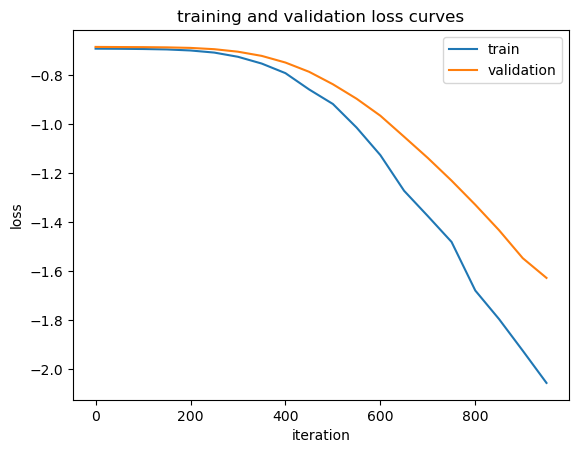

In [936]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

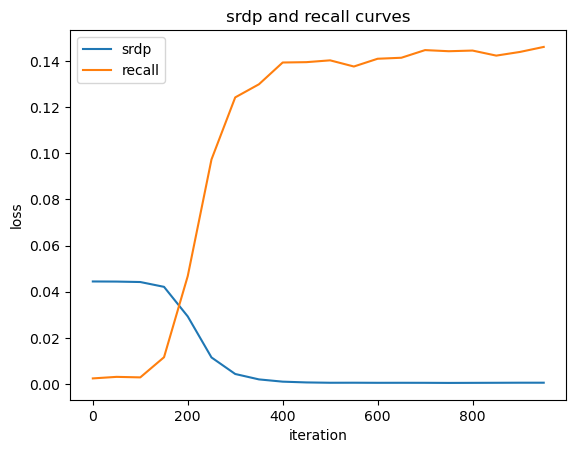

In [937]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

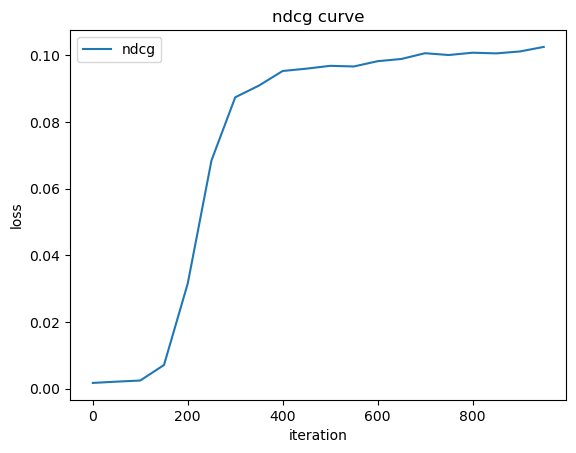

In [938]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('ndcg curve')
plt.legend()
plt.show()

In [939]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}")

[test_loss: -1.78733, test_recall@20: 0.14634, test_precision@20: 0.0473, test_ndcg@20: 0.10661, test_srdp@20: 0.00065, test_nov@20: 0.87156
-1.78733, 0.14634,0.0473,0.10661,0.00065,0.87156


# LightGCN no ID, with Image

## Fusion at Propagation

In [ ]:
# Integrating the embeddings at the forward pass
import torch.nn.functional as F

class LightGCN_combined(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops
        
        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings
        self.image_embeddings = image_embeddings

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_users, embedding_dim)
        self.items_emb = nn.Embedding(num_items, embedding_dim)

        # Dimensionality reduction layers for image embeddings
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], embedding_dim)
    
        # Initialize the embedding weights
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index: SparseTensor):
        # Transform image embeddings to match graph embedding dimensions
        self.txt_embeddings = self.dim_txt_reduction(self.text_embeddings)
        self.image_embeddings = self.dim_img_reduction(self.image_embeddings)
        
        # Concatenate graph embeddings with transformed text and image embeddings
        user_embeddings = torch.cat([self.users_emb.weight, self.text_embeddings[:self.num_users], self.image_embeddings[:self.num_users]], dim=1)
        item_embeddings = torch.cat([self.items_emb.weight, self.text_embeddings[self.num_users:], self.image_embeddings[self.num_users:]], dim=1)

        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Fusion at Initialization

In [872]:
# Integrating the embeddings at the initialization
import torch.nn.functional as F

class LightGCN_image_noID(MessagePassing):

    def __init__(self, num_users, num_items, text_embeddings, image_embeddings, embedding_dim=64, K=3, add_self_loops=False):
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        # Load precomputed text and image embeddings
        self.text_embeddings = text_embeddings  # Tensor of size [num_users + num_items, text_emb_dim]
        self.image_embeddings = image_embeddings  # Tensor of size [num_users + num_items, image_emb_dim]

        # Embedding layers for users and items
        self.users_emb = nn.Embedding(num_embeddings=self.num_users, embedding_dim=self.embedding_dim)
        self.items_emb = nn.Embedding(num_embeddings=self.num_items, embedding_dim=self.embedding_dim)

        # Initialize embeddings
        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)
        
        # Reducing dimensionality to balance
        self.dim_txt_reduction = nn.Linear(self.text_embeddings.shape[1], self.embedding_dim)
        self.dim_img_reduction = nn.Linear(self.image_embeddings.shape[1], self.embedding_dim)
        #self.text_embeddings = nn.Parameter(self.dim_txt_reduction(self.text_embeddings))
        #self.image_embeddings = nn.Parameter(self.dim_img_reduction(self.image_embeddings))

       # Apply dimensionality reduction without making them trainable
        with torch.no_grad():
            #reduced_text = self.dim_txt_reduction(self.text_embeddings)
            reduced_image = self.dim_img_reduction(self.image_embeddings)

        #self.text_embeddings = nn.Parameter(reduced_text, requires_grad=False)
        self.image_embeddings = nn.Parameter(reduced_image, requires_grad=False)

        # Concatenate text and image embeddings without making them trainable
        self.users_embeddings = nn.Parameter(self.image_embeddings[:self.num_users], requires_grad=False)
        self.items_embeddings = nn.Parameter(self.image_embeddings[self.num_users:], requires_grad=False)
    
    

    def forward(self, edge_index: SparseTensor):
        # Compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(edge_index, add_self_loops=self.add_self_loops)

        # Initial embeddings, possibly reduced in dimension
        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight])
        embs = [emb_0]
        emb_k = emb_0

        # Propagate embeddings
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1)

        users_emb_final, items_emb_final = torch.split(emb_final, [self.num_users, self.num_items])

        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight
  

    def message(self, x_j: torch.Tensor) -> torch.Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: torch.Tensor) -> torch.Tensor:
        # Computes \tilde{A} @ x
        return matmul(adj_t, x)


## Training

In [873]:
# Initialize the model
model = LightGCN_image_noID(num_users=num_users, num_items=num_movies, text_embeddings=text_embeddings, image_embeddings=image_embeddings, embedding_dim=64)

In [706]:
# define contants
ITERATIONS = 1000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 50
ITERS_PER_LR_DECAY = 50
K = 20
LAMBDA = 1e-6

In [874]:
# setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cpu.


In [875]:
# training loop
train_losses = []
val_losses = []
val_precision = []
val_recall = []
val_ndcg = []
val_srdp = []
val_nov = []


for iter in range(ITERATIONS):
 # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg, srdp, nov = evaluation(
                model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)

        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}, val_srdp@{K}: {round(srdp, 5)}, val_nov@{K}: {round(nov, 5)}")
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        val_precision.append(precision)
        val_recall.append(recall)
        val_ndcg.append(ndcg)
        val_srdp.append(srdp)
        val_nov .append(nov)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/1000] train_loss: -0.69109, val_loss: -0.68413, val_recall@20: 0.00231, val_precision@20: 0.0011, val_ndcg@20: 0.00144, val_srdp@20: 0.04452, val_nov@20: 7.79732
[Iteration 50/1000] train_loss: -0.6917, val_loss: -0.68446, val_recall@20: 0.00146, val_precision@20: 0.00101, val_ndcg@20: 0.00119, val_srdp@20: 0.0445, val_nov@20: 7.78992
[Iteration 100/1000] train_loss: -0.69267, val_loss: -0.68502, val_recall@20: 0.00193, val_precision@20: 0.00119, val_ndcg@20: 0.00161, val_srdp@20: 0.04429, val_nov@20: 7.7589
[Iteration 150/1000] train_loss: -0.6946, val_loss: -0.68592, val_recall@20: 0.01927, val_precision@20: 0.0043, val_ndcg@20: 0.01021, val_srdp@20: 0.04125, val_nov@20: 7.47298
[Iteration 200/1000] train_loss: -0.699, val_loss: -0.68855, val_recall@20: 0.0547, val_precision@20: 0.01718, val_ndcg@20: 0.03582, val_srdp@20: 0.02671, val_nov@20: 5.85071
[Iteration 250/1000] train_loss: -0.70868, val_loss: -0.69436, val_recall@20: 0.10863, val_precision@20: 0.03172, val_ndcg

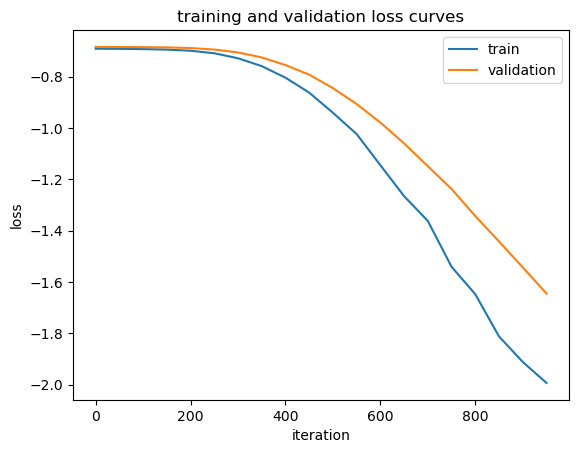

In [876]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

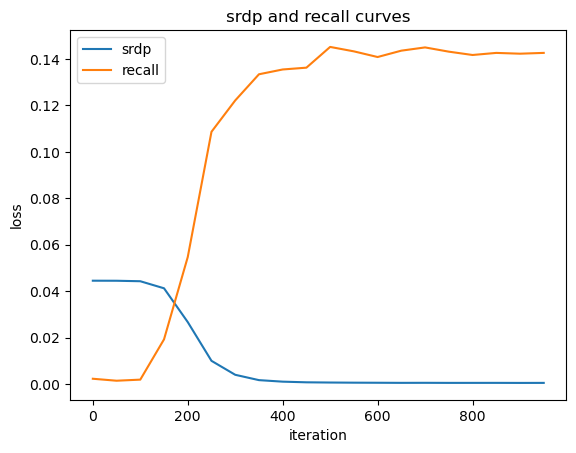

In [877]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_srdp, label='srdp')
plt.plot(iters, val_recall, label='recall')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('srdp and recall curves')
plt.legend()
plt.show()

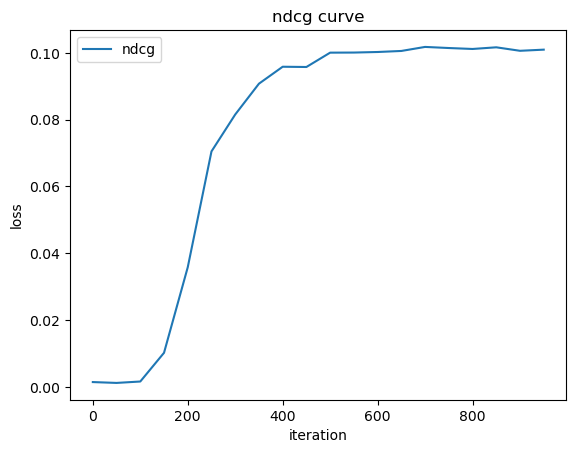

In [878]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(val_srdp))]
plt.plot(iters, val_ndcg, label='ndcg')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('ndcg curve')
plt.legend()
plt.show()

In [879]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg, test_srdp, test_nov = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}, test_srdp@{K}: {round(test_srdp, 5)}, test_nov@{K}: {round(test_nov, 5)}")
print(f"{round(test_loss, 5)}, {round(test_recall, 5)},{round(test_precision, 5)},{round(test_ndcg, 5)},{round(test_srdp, 5)},{round(test_nov, 5)}")

[test_loss: -1.80334, test_recall@20: 0.14955, test_precision@20: 0.04784, test_ndcg@20: 0.10838, test_srdp@20: 0.00066, test_nov@20: 0.86634
-1.80334, 0.14955,0.04784,0.10838,0.00066,0.86634
